## Оптимизация работы отдела управления персоналом с помощью методов машинного обучения

###  Цель исследований

   Целью проекта является выявление степени удовлетворения сотрудников компании условиями их труда, а также прогноз 
увольнения сотрудника на основе комбинирования методов HR-аналитики с технологиями машинного обучения моделей
регрессии и классификации.ь

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка и предобработка данных](#start)
2. [Исследовательский анализ данных](#start1)
3. [Обучение моделей](#start2)
4. [Этап-2. Загрузка и предобработка данных](#start3)
5. [Этап-2. Исследовательский анализ данных](#start4)
6. [Этап-2. Добавление нового входного признака](#start5)
7. [Этап-2. Подготовка данных](#start6)
8. [Этап-2. Обучение модели классификации](#start7)
9. [Выводы](#start8)
10. [Рекомендации](#start9)

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlencode 
from scipy import stats as st
import statistics as stat
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
import numpy as np
import scipy.stats as st
from scipy.stats import spearmanr
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
import shap
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from numpy import median, mean
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
import statistics as stat

## Загрузка и предобработка данных
   <a id="start"></a>

In [7]:
df_tr = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
df_tr[:5]

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

In [8]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [9]:
df_tr['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [10]:
df_tr['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [11]:
df_tr.duplicated().sum()

0

In [12]:
df_tr_ = df_tr.drop('id', axis = 1)

In [13]:
df_tr_.duplicated().sum()

245

In [14]:
df_tr_ = df_tr_.drop_duplicates()

In [15]:
y_train = df_tr_['job_satisfaction_rate']

In [16]:
X_train = df_tr_.drop('job_satisfaction_rate', axis = 1)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   3749 non-null   object
 1   level                  3751 non-null   object
 2   workload               3755 non-null   object
 3   employment_years       3755 non-null   int64 
 4   last_year_promo        3755 non-null   object
 5   last_year_violations   3755 non-null   object
 6   supervisor_evaluation  3755 non-null   int64 
 7   salary                 3755 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 264.0+ KB


In [18]:
df_test = pd.read_csv('/datasets/test_features.csv')
df_test[:5]

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [20]:
y_targ = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
y_targ[:5]

id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08

<div class="alert alert-info">
    В таблицах с входными тестовыми данными df_test и тестовым откликом y_test содержится по 2000 строк, все типы данных 
определены верно, пропусков нет. 
</div>

In [21]:
y_targ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [22]:
df_tt = df_test.merge(y_targ, on = 'id')

In [23]:
X_test = df_tt.drop(['id', 'job_satisfaction_rate'], axis = 1)

In [24]:
y_test = df_tt['job_satisfaction_rate']

In [25]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']

In [26]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [27]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'high', 'low'],
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [28]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [29]:
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
X_train_p.isna().sum()

ohe__dept_marketing              0
ohe__dept_purchasing             0
ohe__dept_sales                  0
ohe__dept_technology             0
ohe__last_year_promo_yes         0
ohe__last_year_violations_yes    0
ord__level                       0
ord__workload                    0
num__employment_years            0
num__salary                      0
num__supervisor_evaluation       0
dtype: int64

In [31]:
X_test_p[:5]

ohe__dept_marketing  ohe__dept_purchasing  ohe__dept_sales  \
0                  1.0                   0.0              0.0   
1                  0.0                   0.0              0.0   
2                  0.0                   0.0              1.0   
3                  0.0                   0.0              1.0   
4                  0.0                   0.0              0.0   

   ohe__dept_technology  ohe__last_year_promo_yes  \
0                   0.0                       0.0   
1                   0.0                       0.0   
2                   0.0                       0.0   
3                   0.0                       0.0   
4                   0.0                       0.0   

   ohe__last_year_violations_yes  ord__level  ord__workload  \
0                            0.0         0.0            0.0   
1                            0.0         0.0            0.0   
2                            0.0         1.0            2.0   
3                            0.0         1.0            2.0   
4                            0.0         1.0            0.0   

   num__employment_years  num__salary  num__supervisor_evaluation  
0               0.111111     0.194444                        1.00  
1               0.000000     0.208333                        0.75  
2               0.444444     0.083333                        0.75  
3               0.555556     0.083333                        0.75  
4               0.444444     0.333333                        1.00

In [32]:
X_test_p.isna().sum()

ohe__dept_marketing              0
ohe__dept_purchasing             0
ohe__dept_sales                  0
ohe__dept_technology             0
ohe__last_year_promo_yes         0
ohe__last_year_violations_yes    0
ord__level                       0
ord__workload                    0
num__employment_years            0
num__salary                      0
num__supervisor_evaluation       0
dtype: int64

<div class="alert alert-info">
    В таблице с трейновой выборкой df_tr содержится 4000 строк, все типы данных определены верно, есть пропуски в поле 'dept' 
(6) и в поле 'level' (4). В таблице с тестовой выборкой X_test содержится 2000 строк, все типы данных определены верно, есть
пропуски в поле 'dept' (2) и в поле 'level' (1). Спомощью pipeline столбцы были масштабированы следующим образом.
Столбцы категориальных признаков 'dept', 'last_year_promo', 'last_year_violations' были обработаны OneHotEncoder() с 
игнорироваанием пропусков в тестовой выборке. Стобцы с порядковыми категориальными признакамми 'level', 'level' были обработаны
OrdinalEncoder() с заменой неизвестных данных на NaN. Пропуски в полях с категориальными признакмми были заполнены с 
применением метода SimpleInputer() с заменой пропусков на моды. В обработанных трейновой и тестовой выборках пропусков нет. 
</div>

## Исследовательский анализ данных
   <a id="start1"></a>

In [33]:
num_columns_ = num_columns + ['job_satisfaction_rate']
df_tr[num_columns_].describe()

employment_years        salary  supervisor_evaluation  \
count       4000.000000   4000.000000            4000.000000   
mean           3.718500  33926.700000               3.476500   
std            2.542513  14900.703838               1.008812   
min            1.000000  12000.000000               1.000000   
25%            2.000000  22800.000000               3.000000   
50%            3.000000  30000.000000               4.000000   
75%            6.000000  43200.000000               4.000000   
max           10.000000  98400.000000               5.000000   

       job_satisfaction_rate  
count            4000.000000  
mean                0.533995  
std                 0.225327  
min                 0.030000  
25%                 0.360000  
50%                 0.560000  
75%                 0.710000  
max                 1.000000

<div class="alert alert-info">
    Распределение непрерывных признаков показывает, что для сотрудников среднее количество лет, проведенных в компании, 
составляет 3,7 года, медианное количество лет немного меньше - 3 года, а стандартное отклонение достаточно велико - 2,5 года, 
что говорит о наличии выбросов или отклонении от нормального распределения. Средняя оценка руководителя составляет 3,47 при 
медианной оценке 4. Стандартное отклонение оценки (1) невелико и составляет примерно 25 % от среднего. Средняя и медианная 
зарплаты близки и раны, соответственно, 33927 и 30000, а стандартное отклонение довольно значительно (14900) и составляет 
почти 50 % от средней зарплаты. Средний уровень удовлетворенности сотрудника (0,53) практически совпадает с медианным (0,56),
но стандартное отклонение (0,23) почти 50 % от среднего, так что в выборе вероятны выбросы. 
</div>

In [34]:
def f(x):
    if x < df_tr['job_satisfaction_rate'].mean():
        return 0
    else:
        return 1
df_tr['sut_level'] = df_tr['job_satisfaction_rate'].apply(f)

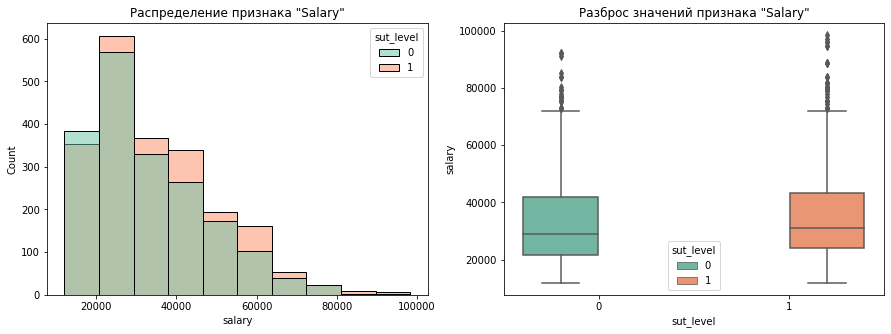

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(data = df_tr, x = df_tr['salary'], bins=10, ax=axes[0], hue = 'sut_level', palette="Set2")
axes[0].set_title('Распределение признака "Salary"')
sns.boxplot(data = df_tr, y = df_tr['salary'], x = 'sut_level', ax=axes[1], hue = 'sut_level', palette="Set2")
axes[1].set_title('Разброс значений признака "Salary"')
plt.show()

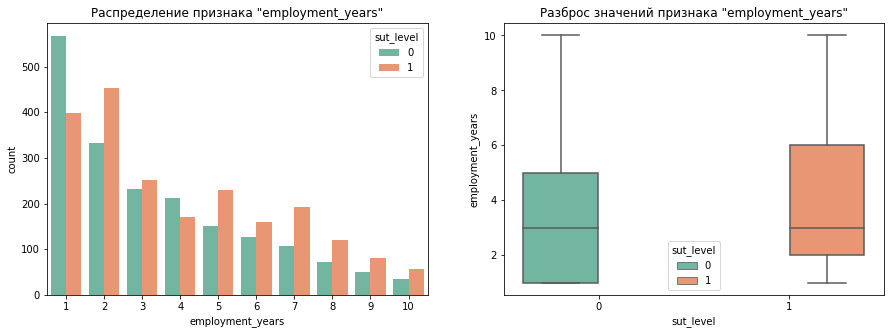

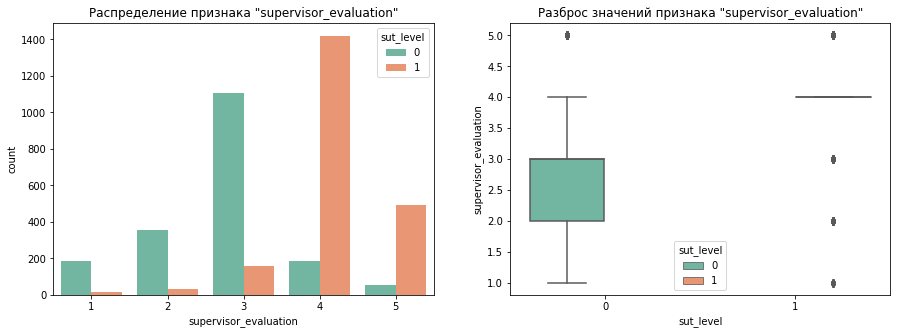

In [36]:
num_columns_disc = ['employment_years', 'supervisor_evaluation']
for i in num_columns_disc:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.countplot(data = df_tr, x = df_tr[i], ax=axes[0], hue = 'sut_level', palette="Set2")
    axes[0].set_title('Распределение признака "{}"'.format(i))
    sns.boxplot(data = df_tr, y = df_tr[i], x = 'sut_level', ax=axes[1], hue = 'sut_level', palette="Set2")
    axes[1].set_title('Разброс значений признака "{}"'.format(i))
    plt.show()

<div class="alert alert-info">
   Гистограмма распределения количества лет, проведенных работниками на предприятии, показывает, что практически во всем диапазоне, кроме 
самого начального (до 2 лет) преобладают сотрудники с уровнем удовлетворения выше среднего, и только в нише с выслугой менее 
2 лет преобладают недовольные сотрудники (есть еще аномалия преолбладания недовольных сотрудников с выслугой 4 года). 
Медианный уровень выслуги лет у довольных сотрудников намного выше, по сравнению с недовольными, выбросы отсутствуют. 
Распределение оценки руководителя нарушает непрерывность признака, но близко к нормальному, большинство сотрудников имеют оценку 4.
Здесь прослеживается четкая дифференциация сотрудников по уровню их удовлетворения: недовольные сотрудники 
преобладают на уровнях оценки ниже 4, а довальные составляют более 90 % сотрудников, имеющих оценку 4 и выше. 
Медианная оценка довольных сотрудников (4) также выше медианной оценки недовольных (2,5). Во всем диапазоне
зарплат довольные сотрудники составляют большинство (кроме самого низкого уровня зарплат ниже 20000), однако, 
медианные уровни зарплат довольных и недовольных работников близки - около 30000. 
</div>

In [37]:
cat_columns = ['dept', 'last_year_promo', 'last_year_violations', 'level', 'workload']

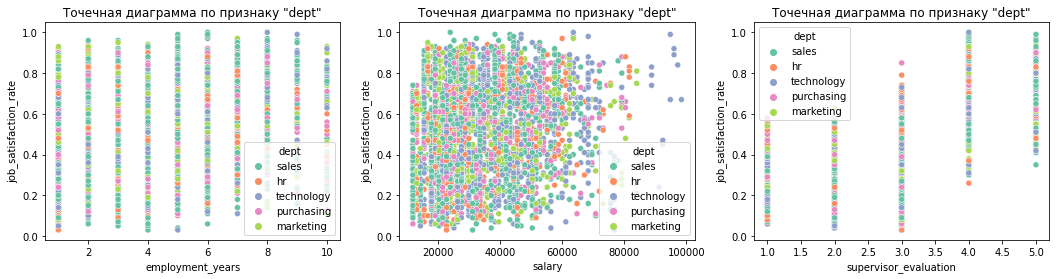

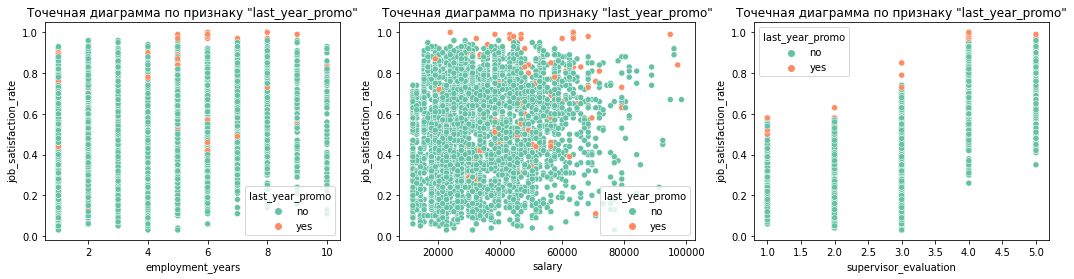

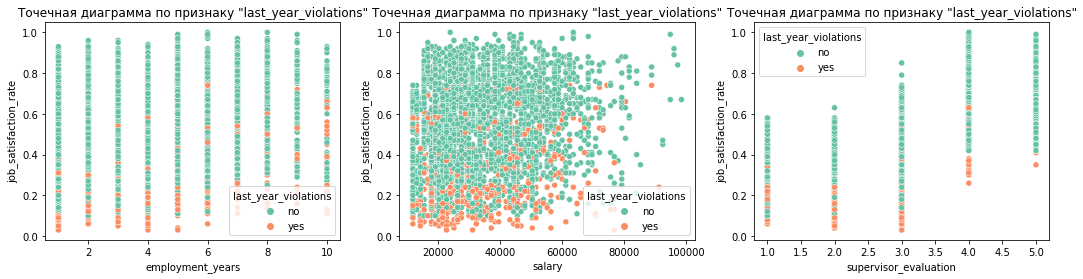

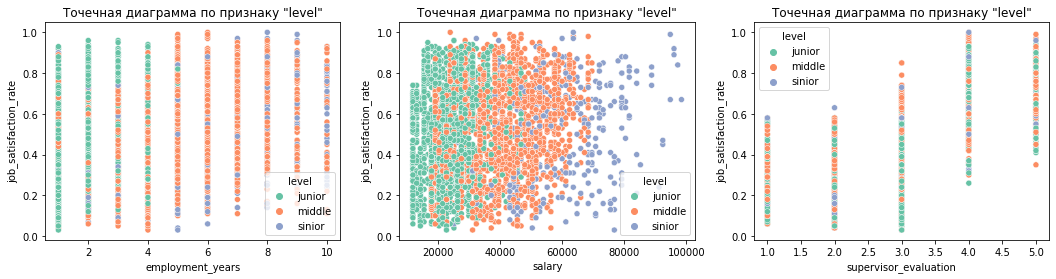

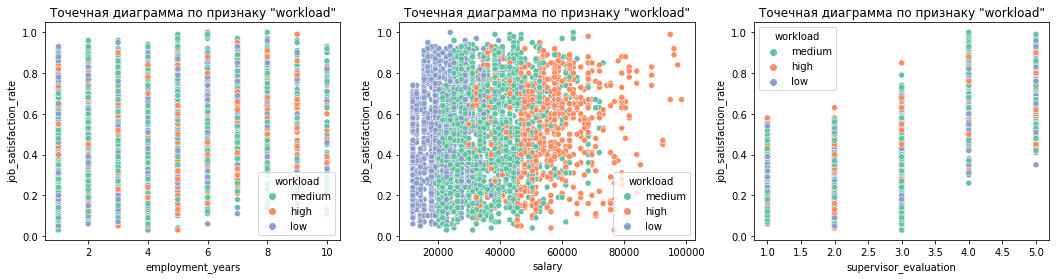

In [38]:
for j in cat_columns:  
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
    for i in range(len(num_columns)):
        sns.scatterplot(data = df_tr, y = 'job_satisfaction_rate', x = num_columns[i], ax=axes[i], hue = j, palette="Set2")
        axes[i].set_title('Точечная диаграмма по признаку "{}"'.format(j))

<div class="alert alert-info">
   Точечные диаграммы зависимости удовлетворенности от числовых признаков с разбивкой по категориям показывает, что зарплата и 
выслуга лет мало влияют на степнь удовлетворенности сотрудника во всех отделах компании, которая заметно повышается только при 
увеличении оценки руководителя выше 3,5. Во всех группах по выслуге лет и оценке руководства сотрудники, получившие продвижение
за последний год, имеют наибольшую степень удовлетворения. Также степень удовлетворенности сотрудников заметно выше при условии
повышения и зарплаты выше среднего уровня (40000). Во всем диапазоне зарплат, выслуге лет и оценок руководства сотрудники,
имевшие нарушения, имеют наименьший уровень удовлетворения. Уровень позиции сотрудника практически не влияет на степень его 
удовлетворения. В некоторых категориях, например, при оценке супервайзера 3, более довольны сотрудники уровня middle. Также в 
интервале зарплат 40000 - 60000 довольство работников уровня sinior заметно ниже, по сравнению с другими зарплатными интервалами.
Степень загруженности сотрудников также не оказывает заметного воздействия на уровень их удовлетворенности. Видимо, это связано
с тем, что наиболее загруженные сотрудники имеют более высокую зарплату, которая уравновешивает степень их удовлетворенности.

</div>

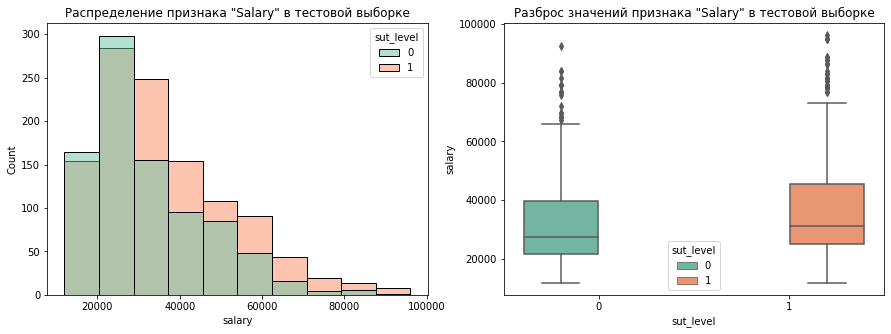

In [39]:
df_tt['sut_level'] = df_tt['job_satisfaction_rate'].apply(f)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(data = df_tt, x = df_tt['salary'], bins=10, ax=axes[0], hue = 'sut_level', palette="Set2")
axes[0].set_title('Распределение признака "Salary" в тестовой выборке')
sns.boxplot(data = df_tt, y = df_tt['salary'], x = 'sut_level', ax=axes[1], hue = 'sut_level', palette="Set2")
axes[1].set_title('Разброс значений признака "Salary" в тестовой выборке')
plt.show()

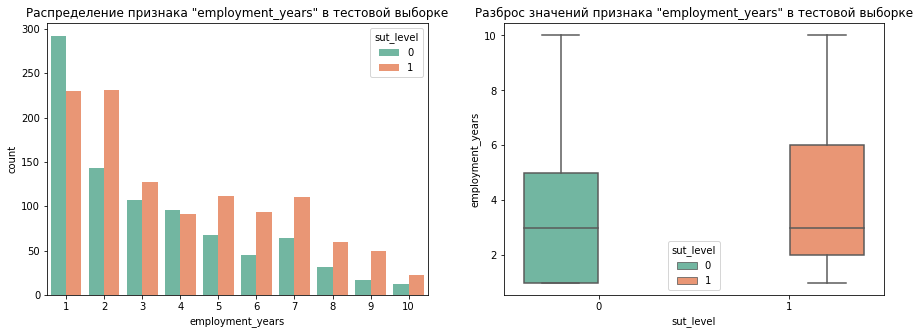

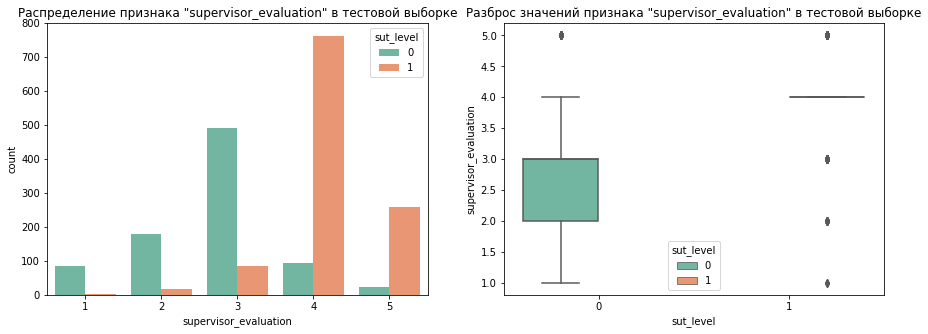

In [40]:
for i in num_columns_disc:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.countplot(data = df_tt, x = df_tt[i], ax=axes[0], hue = 'sut_level', palette="Set2")
    axes[0].set_title('Распределение признака "{}" в тестовой выборке'.format(i))
    sns.boxplot(data = df_tt, y = df_tt[i], x = 'sut_level', ax=axes[1], hue = 'sut_level', palette="Set2")
    axes[1].set_title('Разброс значений признака "{}" в тестовой выборке'.format(i))
    plt.show()

<div class="alert alert-info">
    Распределение числовых признаков в тестовой выборке практически полностью аналогично трейновой выборке.
</div>

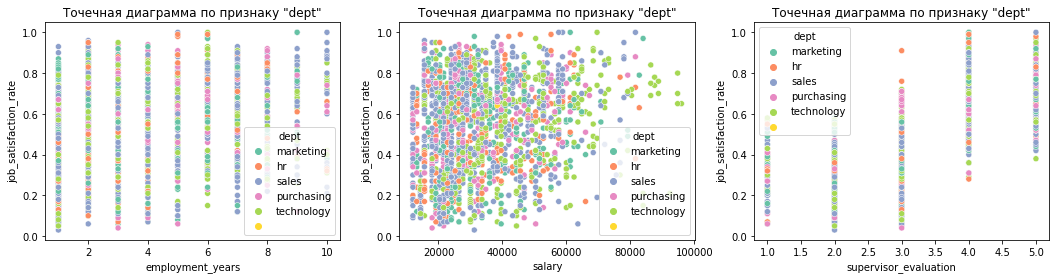

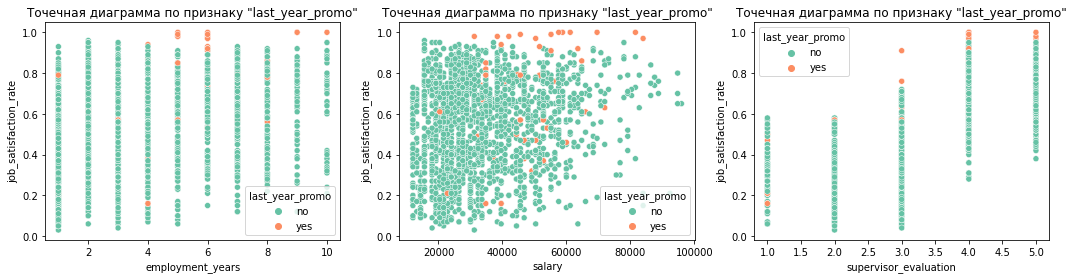

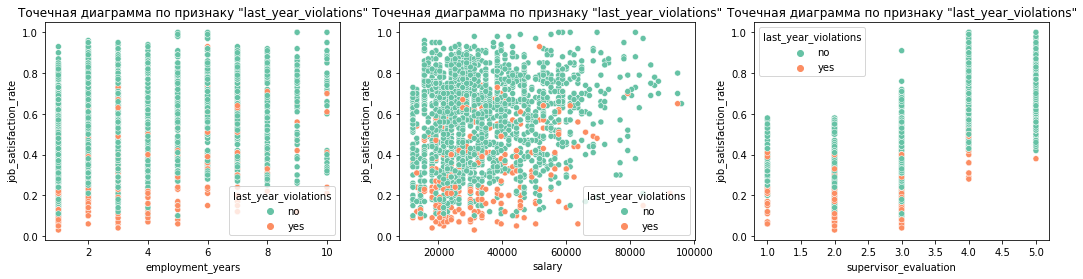

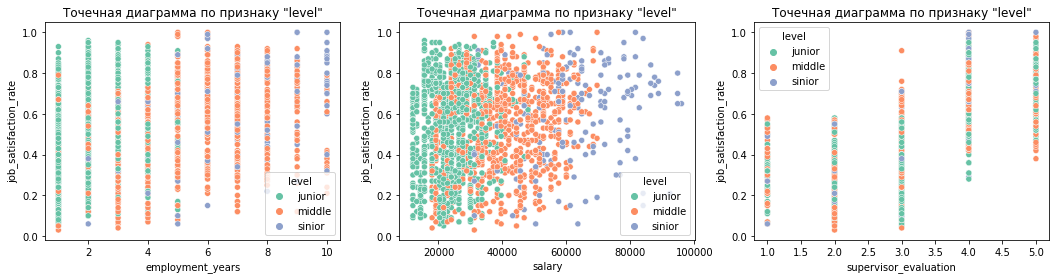

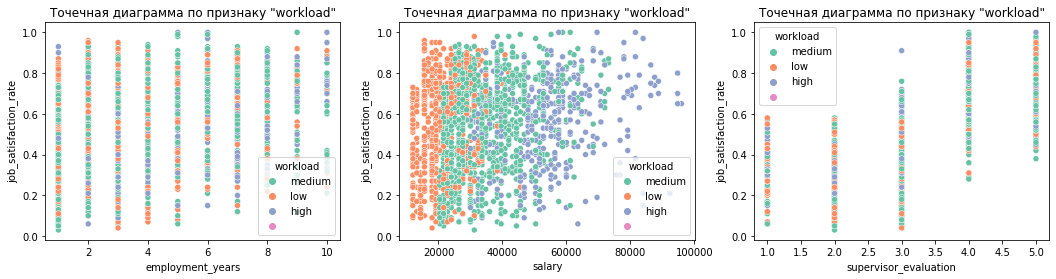

In [41]:
for j in cat_columns:  
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
    for i in range(len(num_columns)):
        sns.scatterplot(data = df_tt, y = 'job_satisfaction_rate', x = num_columns[i], ax=axes[i], hue = j, palette="Set2")
        axes[i].set_title('Точечная диаграмма по признаку "{}"'.format(j))

<div class="alert alert-info">
   Точечные диаграммы зависимости удовлетворенности от числовых признаков для тестовой выборки показывают тенденции
аналогичные, что и для трейновой выборки: зарплата и выслуга лет мало влияют на степнь удовлетворенности сотрудника,
которая заметно повышается при оценках 4 и 5. Сотрудники, получившие продвижение за последний год, имеют наибольшую 
степень удовлетворения. Во всем диапазоне зарплат, выслуге лет и оценок руководства сотрудники, имевшие нарушения, 
имеют наименьший уровень удовлетворения. Уровень позиции сотрудника практически не влияет на степень его 
удовлетворения. Степень загруженности сотрудников также не оказывает заметного воздействия на уровень их 
удовлетворенности.
</div>

In [42]:
phik_overview = df_tr.drop(['id', 'sut_level'], axis = 1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])
phik_overview.shape

(9, 9)

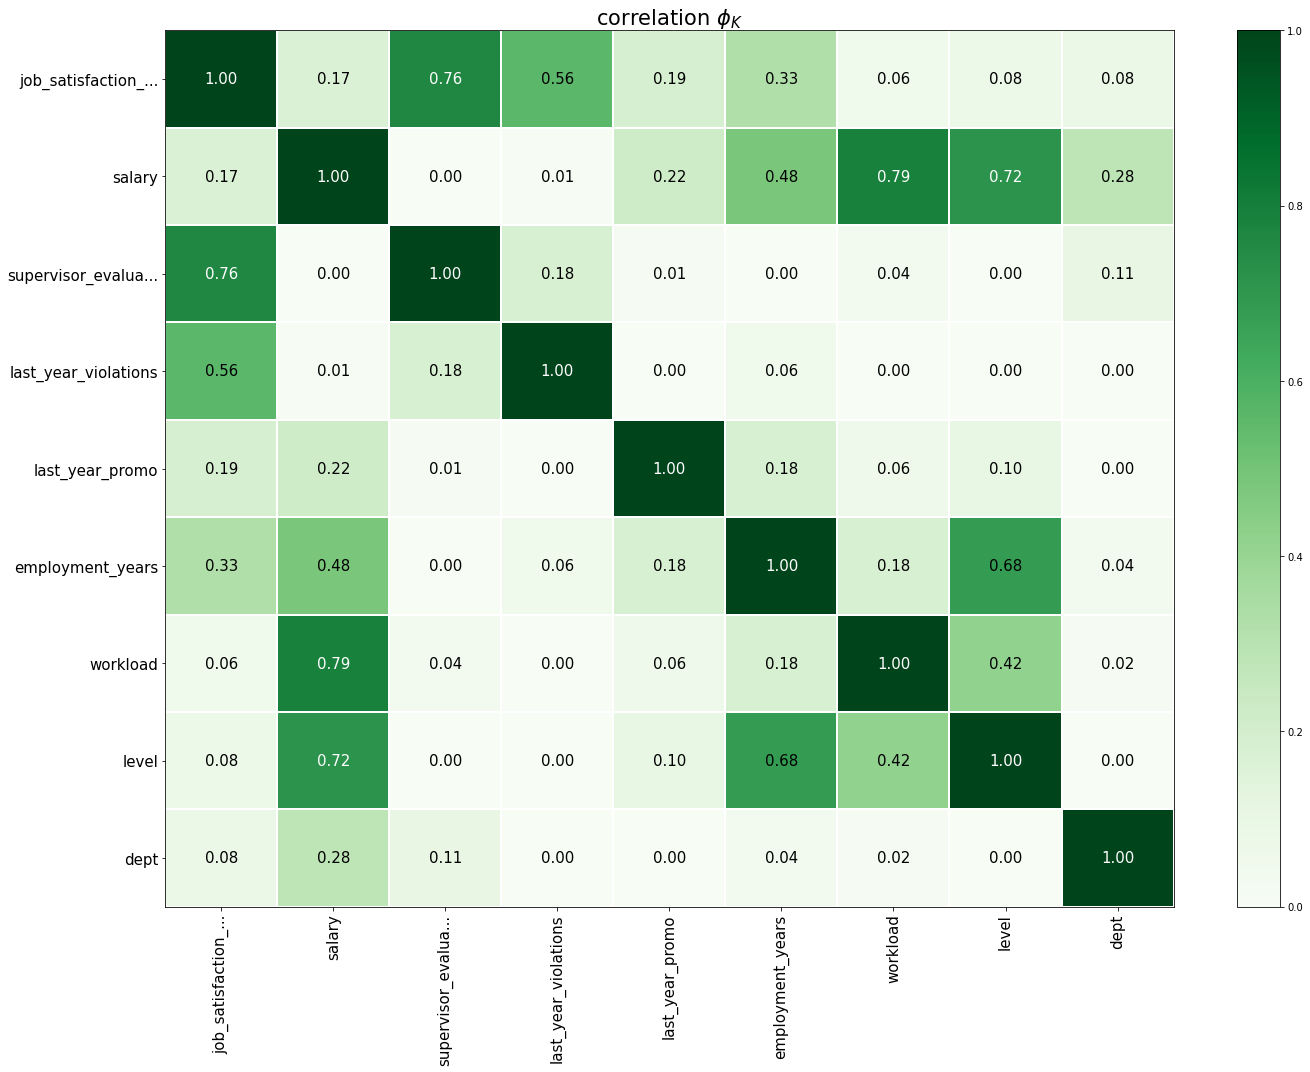

In [43]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<div class="alert alert-info">
   Излишне высокой взаимной корреляции признаков (выше 0,9) не обнаружено. Наибольшая корреляция наблюдается между признаками
'salary' и 'workload' (0.89), а также между 'salary' и 'level' (0,85). На цель в наибольшей степени влияет 'supervizor_evaluation'
(0.73). Бесполезных для цели признаков тоже нет, так как самая низкий коэф корреляции между целью и 'workload' выше 10 % (12 %). 
</div>

In [44]:
phik_overview = df_tt.drop(['id'], axis = 1).phik_matrix(interval_cols='salary')
phik_overview.shape

(10, 10)

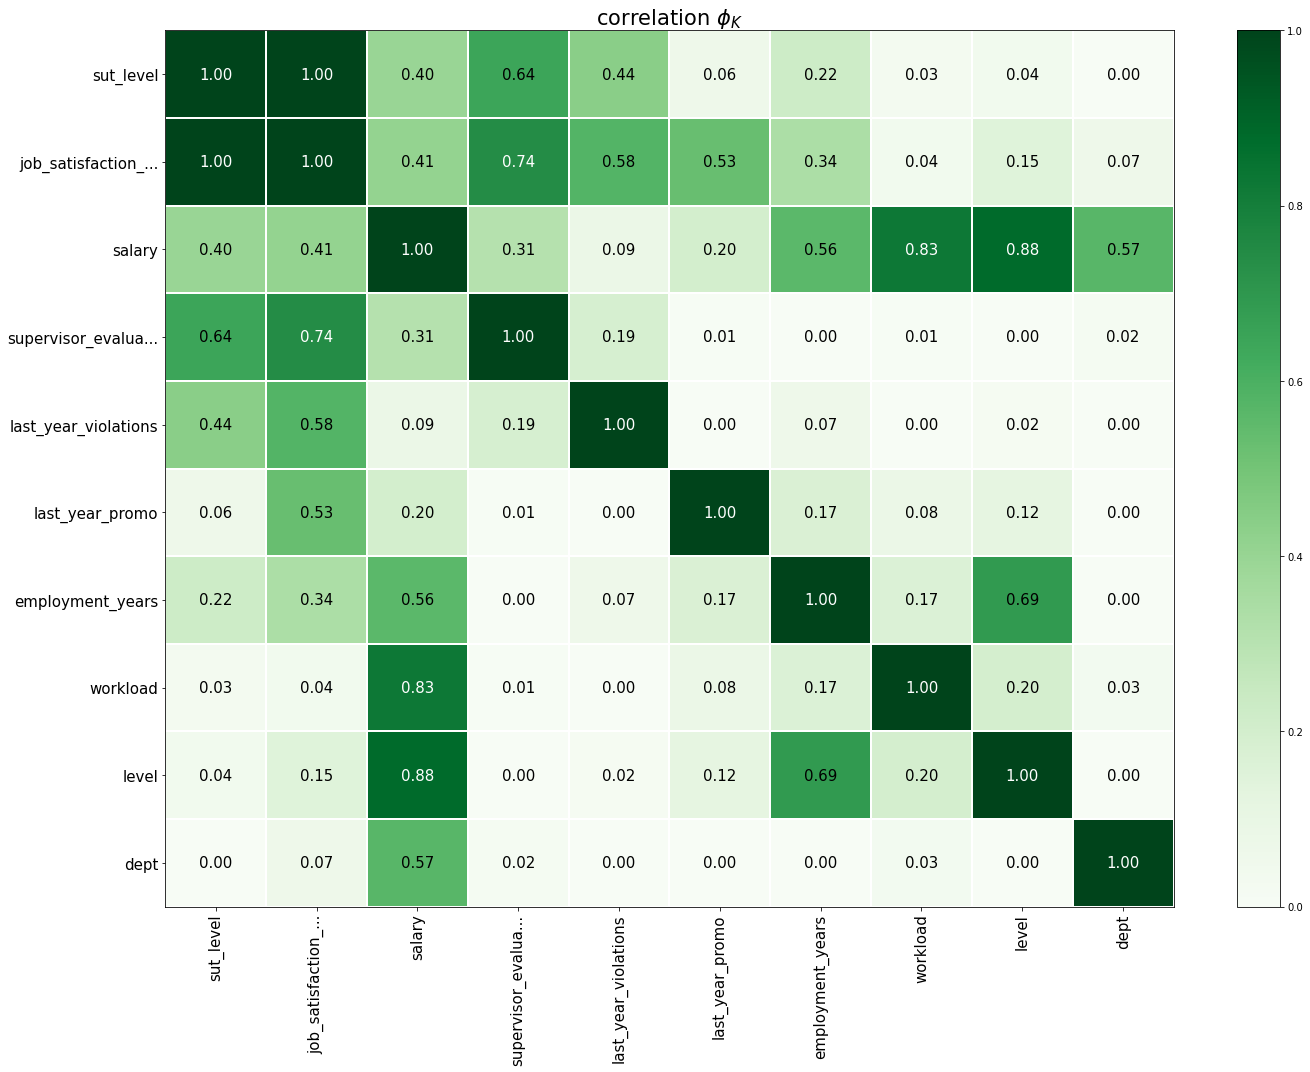

In [45]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<div class="alert alert-info">
   Коэффициенты корреляции отклика с признаками, а также коэффициенты взаимной корреляции признаков в тестовой выборке 
аналогичны трейновой.
</div>

In [46]:
y, X = dmatrices('job_satisfaction_rate ~ employment_years + supervisor_evaluation + salary', data=df_tr, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Признаки'] = X.columns
vif

VIF               Признаки
0  18.277720              Intercept
1   1.274281       employment_years
2   1.000014  supervisor_evaluation
3   1.274269                 salary

<div class="alert alert-info">
    Степень взаимной корреляции количественных признаков проверена с помощью оценки для каждого признака коэффициента инфляции
дисперсии (VIF), который характеризует степень корреляции между данным признаком и другими признаками модели. Проверка 
показала, что коэффициенты VIF для всех факторов существенно меньше 5 (лежат в пределах 1 - 1,5), что означает умеренную
взаимнную корреляцию, которая недостаточно велика, чтобы повлиять на надежность модели.
</div>

## Обучение моделей
   <a id="start2"></a>

In [47]:
RANDOM_STATE = 42

In [48]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

In [49]:
def custom_metric(y_true, y_pred):
    metric = (100/len(y_pred)) * sum(2*abs(np.array(y_true) - np.array(y_pred))/((abs(np.array(y_true)) + abs(np.array(y_pred)))))
    return metric

# создаём пользовательскую метрику
SMAPE = make_scorer(custom_metric, greater_is_better = False) 

In [50]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,50),
        'models__max_features': range(2,50),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsRegressor()],
        'models__n_neighbors': range(2,50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [Lasso(
            random_state=RANDOM_STATE
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [Ridge(
            random_state=RANDOM_STATE
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
     {
        'models': [SVR()],
        'models__kernel': ['rbf', 'sigmoid'],
        'models__C': range(1,50),
        'models__gamma': range(1,50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [51]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=SMAPE,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [52]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                        {'models': [Ridge(random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVR()],
                                         'models__C': range(1, 50),
                                         'models__gamma': range(1, 50),
                                         'models__kernel': ['rbf', 'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(custom_metric, greater_is_better=False, response_method='predict'))

In [53]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                                              ['medium',
                                                                                               'high',
                                                                                               'low']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years', 'salary',
                                                   'supervisor_evaluation'])])),
                ('models',
                 DecisionTreeRegressor(max_depth=14, max_features=19,
                                       min_samples_leaf=5, random_state=42))])

In [54]:
abs(randomized_search.best_score_)

15.5352818802755

In [55]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search.cv_results_)[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
    ].sort_values('rank_test_score')

rank_test_score                            param_models  mean_test_score  \
7                1  DecisionTreeRegressor(random_state=42)       -15.535282   
4                2  DecisionTreeRegressor(random_state=42)       -15.623023   
2                3  DecisionTreeRegressor(random_state=42)       -15.674458   
8                4  DecisionTreeRegressor(random_state=42)       -15.700577   
0                5  DecisionTreeRegressor(random_state=42)       -15.761981   
6                6  DecisionTreeRegressor(random_state=42)       -15.915700   
5                7  DecisionTreeRegressor(random_state=42)       -17.484338   
3                8  DecisionTreeRegressor(random_state=42)       -18.961615   
1                9  DecisionTreeRegressor(random_state=42)       -23.965105   
9               10                                   SVR()       -27.538345   

                                                                                                                                                                          params  
7  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 5, 'models__max_features': 19, 'models__max_depth': 14, 'models': DecisionTreeRegressor(random_state=42)}  
4  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 6, 'models__max_features': 35, 'models__max_depth': 30, 'models': DecisionTreeRegressor(random_state=42)}  
2    {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 8, 'models__max_features': 18, 'models__max_depth': 44, 'models': DecisionTreeRegressor(random_state=42)}  
8     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 35, 'models__max_depth': 33, 'models': DecisionTreeRegressor(random_state=42)}  
0  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 1, 'models__max_features': 11, 'models__max_depth': 14, 'models': DecisionTreeRegressor(random_state=42)}  
6     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 9, 'models__max_features': 25, 'models__max_depth': 48, 'models': DecisionTreeRegressor(random_state=42)}  
5     {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 5, 'models__max_features': 4, 'models__max_depth': 36, 'models': DecisionTreeRegressor(random_state=42)}  
3     {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 1, 'models__max_features': 42, 'models__max_depth': 6, 'models': DecisionTreeRegressor(random_state=42)}  
1      {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 33, 'models__max_depth': 2, 'models': DecisionTreeRegressor(random_state=42)}  
9                                                        {'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__gamma': 27, 'models__C': 17, 'models': SVR()}

In [56]:
y_test_pred =  randomized_search.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [57]:
custom_metric(y_test, y_test_pred)

13.644218095579545

<div class="alert alert-info">
    Для сравнения в пайплане выбраны модели линейной регрессии linear_Regression, Lasso, Ridge, SVR. Также сравниваются модель 
KNeighborsRegressor и дерево решений DecisionTreeRegressor. Лучшую метрику имеет модель DecisionTreeRegressor со следующими
гиперпараметрами: 'models__min_samples_leaf' = 5, 'models__max_features' = 19, 'models__max_depth' = 14. Для масштабирования
числовых данных используется StandardScaler(). Среднее значение метрики SMAPE при кросс-валидации с применением метода 
RandomizedSearchCV() для данной модели равно 15,54. В 10 лучших моделей входит модель SVR (10 место) со средней величиной
метрики 27,54. 
    Модель не переучивается (ошибка разброса нет) - значение метрики SMAPE на тестовой выборке составляет 13,64.
</div>

In [58]:
dummy_regr = DummyRegressor(strategy="mean")

In [59]:
dummy_regr.fit(X_train_p, y_train)

DummyRegressor()

In [60]:
y_test_dummy = dummy_regr.predict(X_test_p)

In [61]:
custom_metric(y_test, y_test_dummy)

38.262257902022064

<div class="alert alert-info">
    Обучение dummy-модели, присваивающей всем объектам среднее значение цели, показывает метрику 38,8, что существенно
выше, чем метрика лучшей модели DecisionTreeRegressor. Поэтому поиск лучшей модели методом кросс-валидации прошел
успешно.
</div>

In [62]:
model = randomized_search.best_estimator_.named_steps['models']

In [63]:
model.feature_importances_

array([0.008742  , 0.0026725 , 0.01227148, 0.00919545, 0.01087578,
       0.0552289 , 0.04830218, 0.02078166, 0.07301341, 0.07664105,
       0.68227559])

In [64]:
feature_importance = pd.DataFrame({'Feature': X_train_p.columns, 'Importance': np.abs(model.feature_importances_)})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = True)

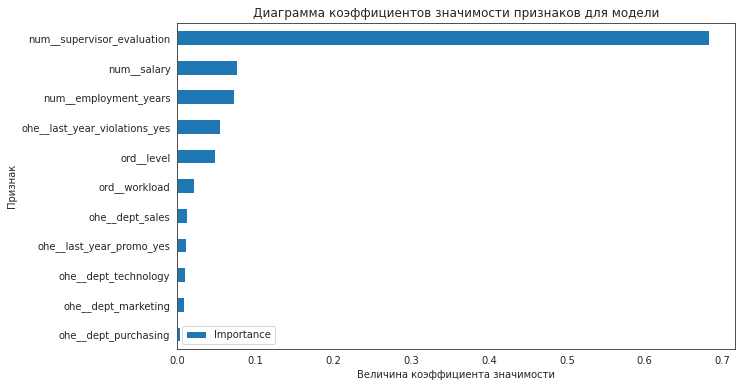

In [65]:
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Диаграмма коэффициентов значимости признаков для модели')
plt.xlabel('Величина коэффициента значимости')
plt.ylabel('Признак');

<div class="alert alert-info">
    Изучение значимости признаков для лучшей модели показывает, что наибольший вклад в регрессию с большим отрывом вносит 
признак 'supervisor_evaluation' (около 0,7), затем идут признаки 'salary' (0,1), 'employment_years' (0,09), 
'last_year_violations_yes' (0,05) и 'level' (0,05). Вклад остальных признаков несущественен. 
</div>

<div class="alert alert-info">
    Из всех рассмотренных моделей в рамках указанных для варьирования диапазонов гиперпараметров наилучшей оказалась модель
дерево решений, так как данная модель основана на применении условных операторов и, в целом, более эффективна, по сравнению с 
моделями линейной регрессии. 
    Модели линейной регрессии (Linear_Regression, Lasso и Ridge), а также модель KNeighborsRegressor не дают приемлемых решений.
    При дальнейшем усложнении моделей DecisionTreeRegressor и SVR (расширении диапазона варьирования значений гиперпараметров)
при кросс-валидации обе модели показывает среднюю метрику SMAPE ниже 15, но при этом растет степень переучивания модели. 
     Упрощение моделей при снижении диапазонов варьирования гиперпараметров приводит к увеличению средней метрики при 
кросс-валидации выше 15 (ошибка смещения).  
</div>

## Этап 2. Загрузка и предобработка данных
   <a id="start3"></a>

In [66]:
tr_quit = pd.read_csv('/datasets/train_quit.csv')
tr_quit[:5]

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

In [67]:
label_encoder = LabelEncoder()
tr_quit['quit'] = label_encoder.fit_transform(tr_quit['quit'])

In [68]:
tr_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 312.6+ KB


<div class="alert alert-info">
    В таблице трейновых данных все типы полей определены верно, пропусков нет.
</div>

In [69]:
test_quit = pd.read_csv('/datasets/test_features.csv')
test_quit[:5]

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

In [70]:
targ_quit = pd.read_csv('/datasets/test_target_quit.csv')
targ_quit[:5]

id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes

In [71]:
targ_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [72]:
targ_quit['quit'] = label_encoder.transform(targ_quit['quit'] )

<div class="alert alert-info">
    В таблице целевого признака типы данных верные, пропусков нет.
</div>

In [73]:
tr_quit_ = tr_quit.drop(['id'], axis = 1)

In [74]:
tr_quit_.duplicated().sum()

1413

In [75]:
tr_quit_ = tr_quit_.drop_duplicates()

In [76]:
y_train_ = tr_quit_['quit']

In [77]:
X_train_ = tr_quit_.drop(['quit'], axis = 1)

In [78]:
df_q = test_quit.merge(targ_quit, on = 'id')

In [79]:
y_test_ = df_q['quit']

In [80]:
X_test_ = df_q.drop(['id','quit'], axis = 1)

In [81]:
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']

In [82]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [83]:
X_train_q = pd.DataFrame(
    data_preprocessor.fit_transform(X_train_),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_q = pd.DataFrame(
    data_preprocessor.transform(X_test_),
    columns=data_preprocessor.get_feature_names_out()    
) 

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<div class="alert alert-info">
    Произведено масштабирование трейновых и тестовых данных с использованием OneHotEncoder() и OrdinalEncoder() для 
категориальных данных и MinMaxEncoder() для численных данных. Целевой признак закодирован с помолщью LabelEncoder().
</div>

## Этап 2. Исследовательский анализ данных
   <a id="start4"></a>

In [84]:
tr_quit[num_columns].describe()

employment_years        salary  supervisor_evaluation
count       4000.000000   4000.000000            4000.000000
mean           3.701500  33805.800000               3.474750
std            2.541852  15152.415163               1.004049
min            1.000000  12000.000000               1.000000
25%            2.000000  22800.000000               3.000000
50%            3.000000  30000.000000               4.000000
75%            6.000000  43200.000000               4.000000
max           10.000000  96000.000000               5.000000

<div class="alert alert-info">
    Распределение непрерывных признаков показывает, что для сотрудников среднее количество лет, проведенных в компании, 
составляет 3,7 года, медианное количество лет немного меньше - 3 года, а стандартное отклонение достаточно велико - 2,54 года, 
что говорит о наличии выбросов или отклонении от нормального распределения. Средняя оценка руководителя составляет 3,47 при 
медианной оценке 4. Стандартное отклонение оценки (1) невелико и составляет примерно 25 % от среднего. Средняя и медианная 
зарплаты близки и раны, соответственно, 33805 и 30000, а стандартное отклонение довольно значительно (15152,4) и составляет 
почти 50 % от средней зарплаты. 
</div>

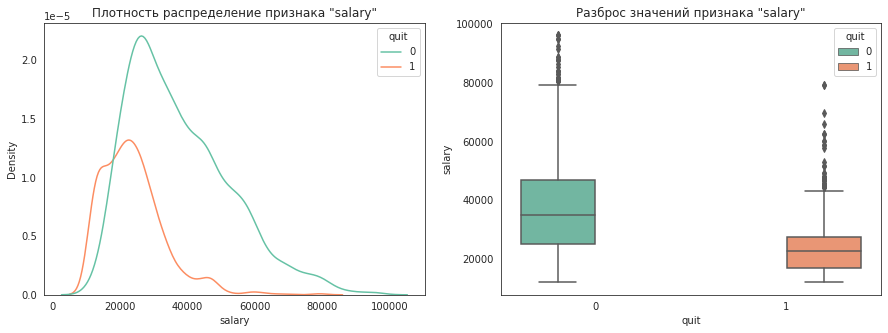

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.kdeplot(data = tr_quit, x = tr_quit['salary'], ax=axes[0], hue = 'quit', palette="Set2")
axes[0].set_title('Плотность распределение признака "salary"')
sns.boxplot(data = tr_quit, y = tr_quit['salary'], x = 'quit', ax=axes[1], hue = 'quit', palette="Set2")
axes[1].set_title('Разброс значений признака "salary"')
plt.show()

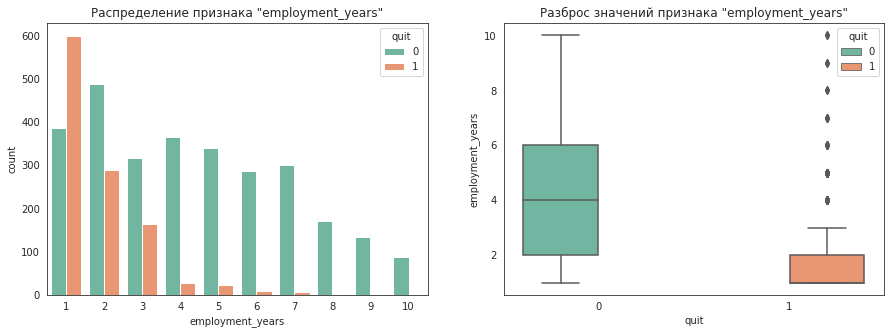

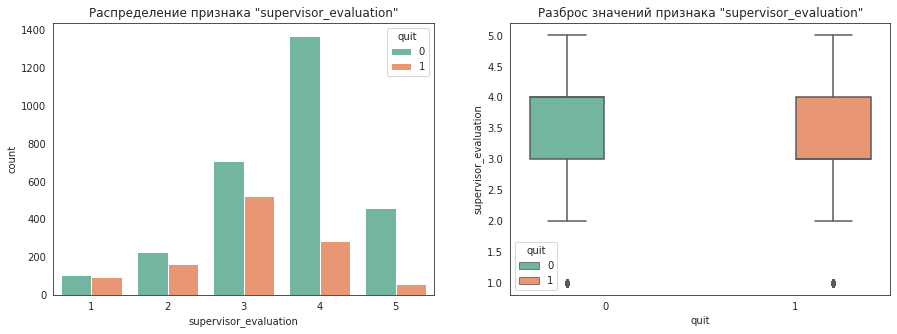

In [86]:
for i in num_columns_disc:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.countplot(data = tr_quit, x = tr_quit[i], ax=axes[0], hue = 'quit', palette="Set2")
    axes[0].set_title('Распределение признака "{}"'.format(i))
    sns.boxplot(data = tr_quit, y = tr_quit[i], x = 'quit', ax=axes[1], hue = 'quit', palette="Set2")
    axes[1].set_title('Разброс значений признака "{}"'.format(i))
    plt.show()

<div class="alert alert-info">
    Наибольший риск быть увеленными у сотрудников с относительно коротким сроком работы в компании - до 3 лет. После 4 лет 
работы сотрудников практически не увольняют. Медианный срок работы уволенных сотрудников менее 1 года, а не увелинных - 4 года.
Среди уволенных сотрудников есть много выбросов со стажем работы до 10 лет. Более 80 % сотрудников, имеющих оценку руководителя
3 и ниже, увольняют. При оценках 4 и 5 увольняют менее 20 % сотрудников. Медианная оценка уволенных сотрудников составляет 3 
балла, а не уволенных - 4 балла. Более 90 % уволенных сотрудников имели относительно низкую зарплату - менее 40000. Среди 
сотрудников с зарплатами 40000 - 50000 количество не уволенных более 80 %, а в интервале зарплат более 50000 уволенных 
практически нет. Медианная зарплата уволенных составляет около 25000, а не уволенных - порядка 35000. Среди обоих категорий
есть много выбросов с аномально высокими зарплатами - 80000 - 100000 для не уволенных и 45000 - 80000 для уволенных. 
</div>

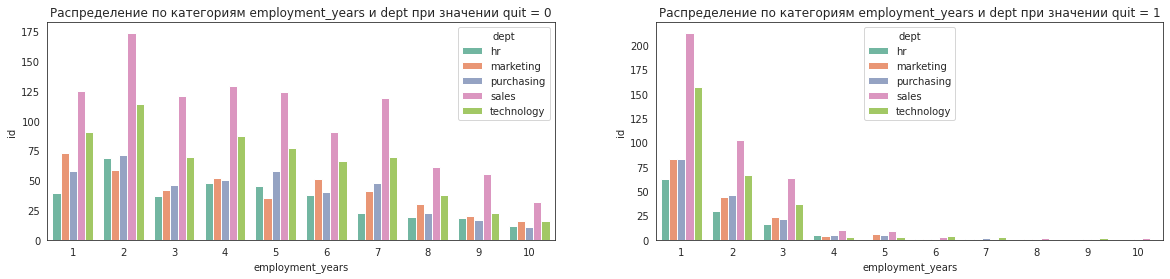

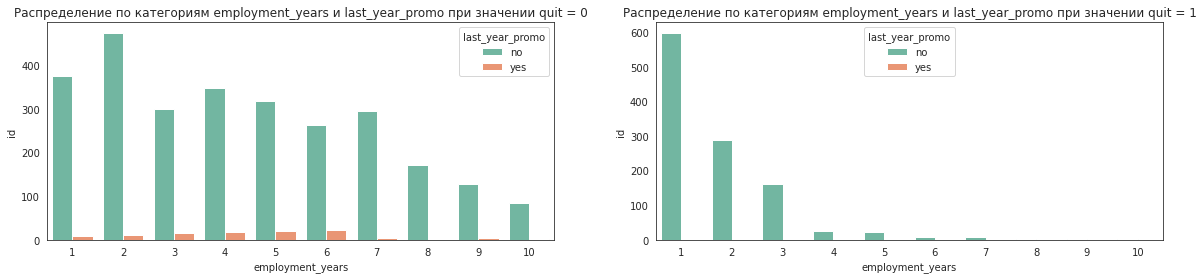

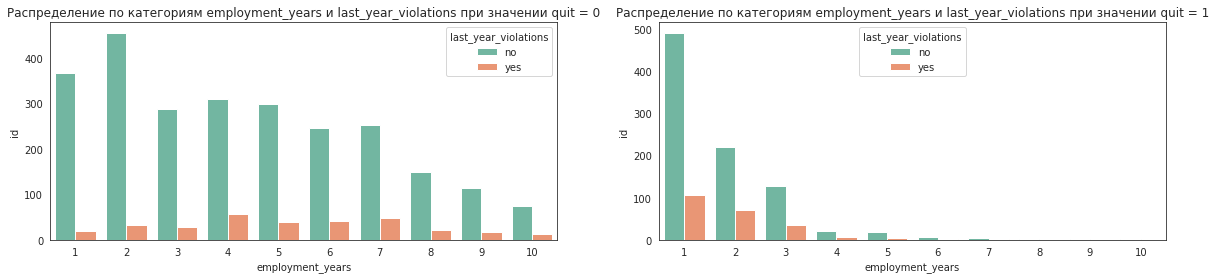

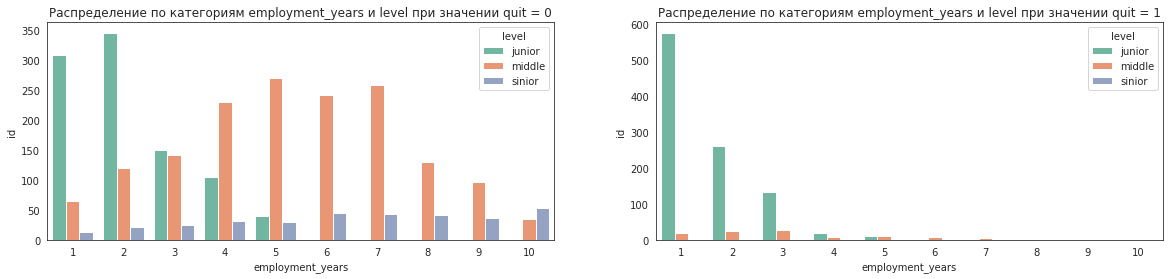

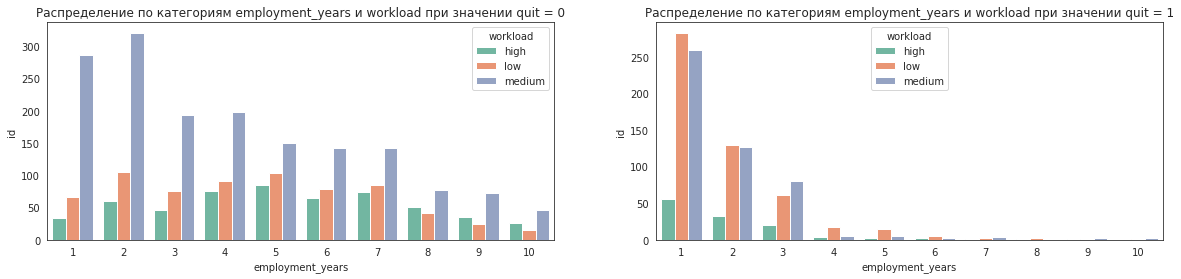

In [87]:
for j in cat_columns:  
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
    for i in range(len(tr_quit['quit'].unique())):
        sns.barplot(data = tr_quit.loc[tr_quit['quit'] == i].groupby(['employment_years', j], as_index = False).agg({'id':'count'}), x = 'employment_years', y = 'id', hue = j, ax=axes[i], palette="Set2")
        axes[i].set_title('Распределение по категориям {} и {} при значении quit = {}'.format('employment_years', j, i))

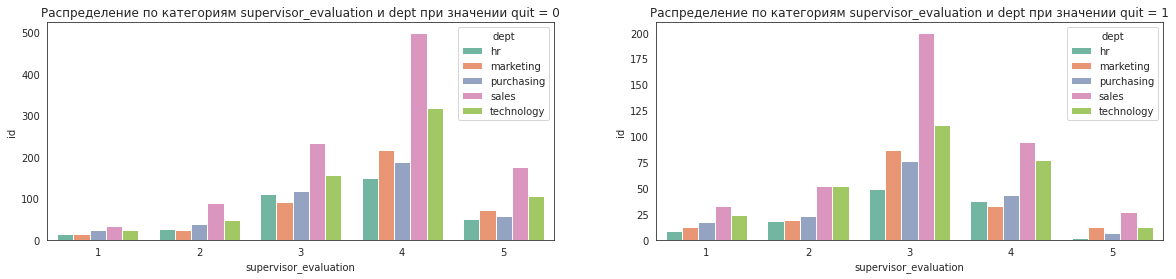

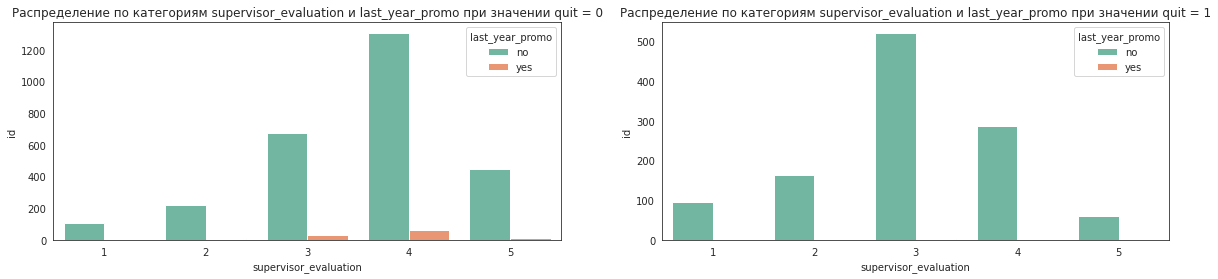

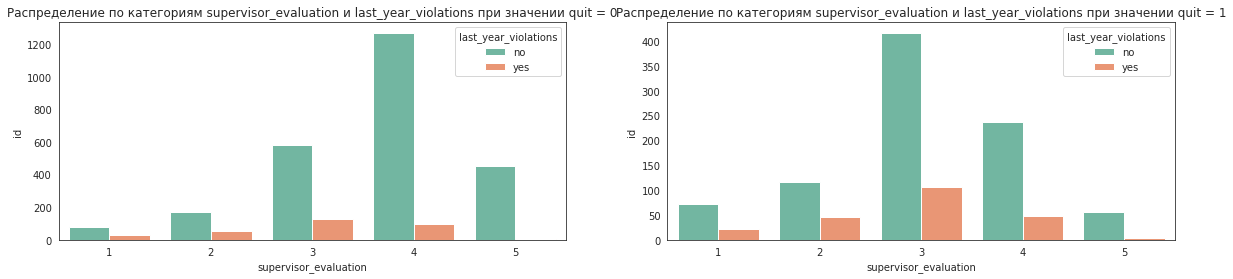

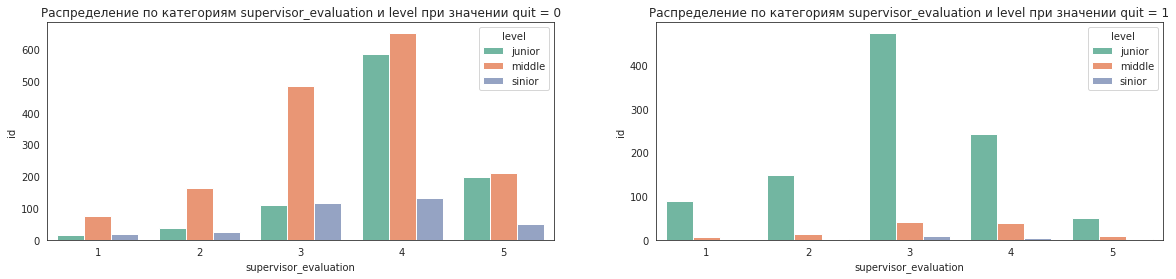

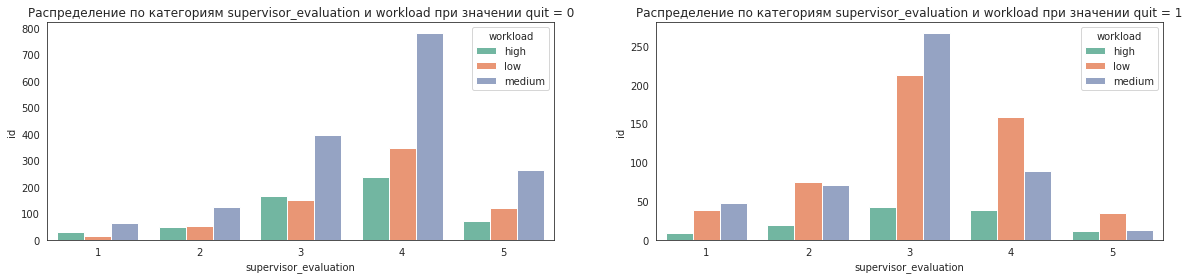

In [88]:
for j in cat_columns:  
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
    for i in range(len(tr_quit['quit'].unique())):
        sns.barplot(data = tr_quit.loc[tr_quit['quit'] == i].groupby(['supervisor_evaluation', j], as_index = False).agg({'id':'count'}), x = 'supervisor_evaluation', y = 'id', hue = j, ax=axes[i], palette="Set2")
        axes[i].set_title('Распределение по категориям {} и {} при значении quit = {}'.format('supervisor_evaluation', j, i))

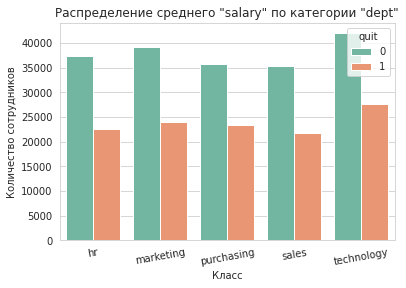

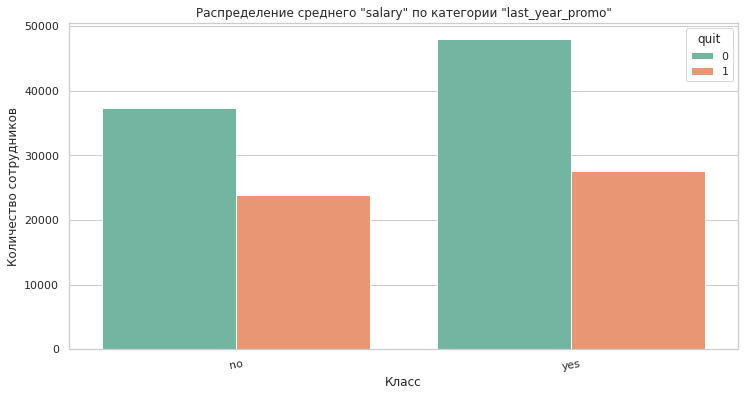

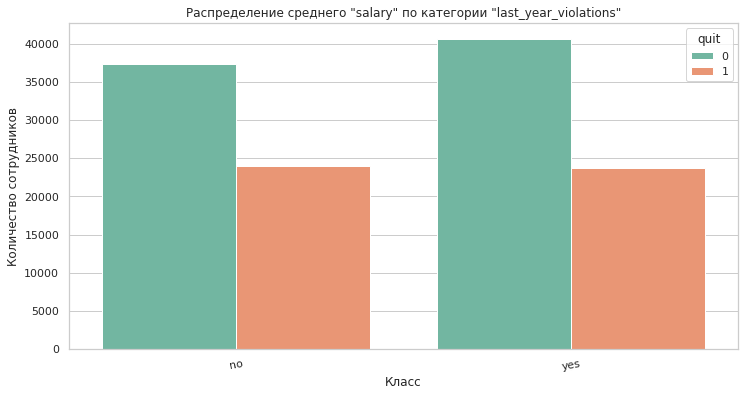

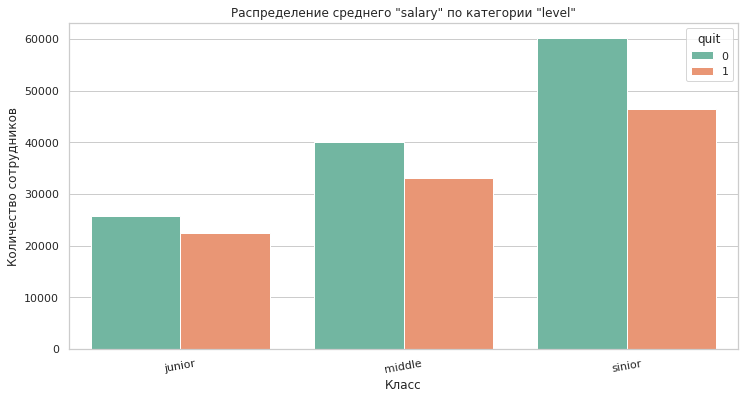

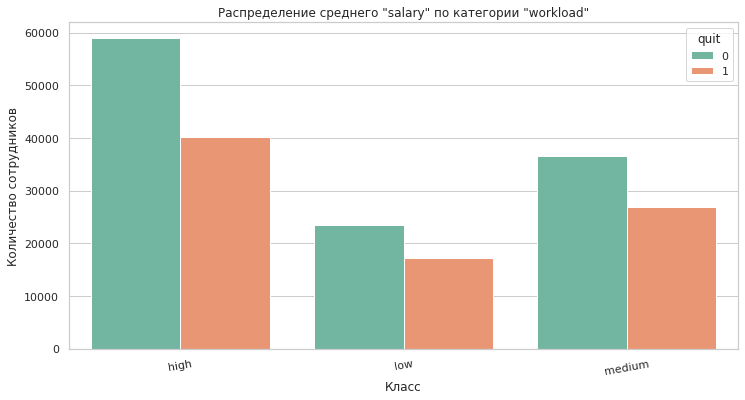

In [89]:
for i in range(len(cat_columns)):
    sns.set_style('whitegrid')
    sns.set_palette('bright')
    ax =  sns.barplot(data = tr_quit.groupby([cat_columns[i], 'quit'], as_index = False).agg({'salary':'mean'}), x = cat_columns[i], y = 'salary', hue = 'quit', palette="Set2")
    sns.set(rc={'figure.figsize':(12,6)})
    ax.set (xlabel='Класс',
            ylabel='Количество сотрудников',
            title='Распределение среднего "salary" по категории "{}"'.format(cat_columns[i]))  
    plt.xticks(rotation = 10)
    plt.show()
    
   

<div class="alert alert-info">
    Уволенные сотрудники во всех отделах компании имеют стаж от 1 до 3 лет. Наибольшее количество уволенных 
работали в компании не более года. Кроме того,  большинство не уволенных имеют среднюю оценку 4, а зарплата
не уволенных выше на 30 - 50 % во всех подразделениях компании 'debt'. Уволенные сотрудники, у которых не было повышения в 
прошлом году, работали в компании в среднем уколо 2 лет, а не уволенные - около 4,5 лет. И, наоборот, уволенные сотрудники с 
недавним повышением работали в компании около 6 лет, а не уволенные - около 4,5 лет. То есть, повышенные сотрудники с высоким 
стажем работы в компании склонны к увольнению, например, в связи с переходом в другие компании на более высокие должности или 
оклад. Имеющие и не имеющие повышение уволенные сотрудники имеют среднюю оценку руководителя на 10-15 % ниже, чем не уволенные, 
а средняя зарплата не уволенных на 30 и 50 % выше, по сравнению с уволенными, соответственно, в категориях не имеющих и имеющих
повышение. Не уволенные сотрудники не имеющие нарушения работают в компании, в среднем, около 4 лет, а уволенные без замечаний -
около 2 лет. Аналогичная ситуация с сотрудниками, имеющими нарушения, - средняя выслуга не уволенных более 5 лет, а уволенных - 
также около 2 лет. То есть, компания более толеранта к сотрудникам, имеющим более долгий стаж. Средняя оценка не уволенных без
нарушений на 10-15 % выше, чем уволенных, а средняя оценка не уволенных с нарушениями всего на 3 - 5 % выше, по сравнению с 
уволенными. Уволенные сотрудники имеют среднюю зарплату на 40-45 % ниже, по сравнению с не уволенными не зависимо от наличия 
нарушений. Во всех категориях уровня позиции сотрудника выслуга лет выше у не уволенных, по сраванению с уволенными - на 15 %
(junior), 40 % (middle) и 30 % (sinior). Также средняя оценка и средняя зарплата не уволенных всех уровней на 10-15 % выше, чем 
уволенных. Выслуга лет не уволенных сотрудников в 2 - 2,5 разы выше, чем уволенных при любом уровне загруженности. Оценка и 
зарплата не уволенных сотрудников на 15-20 % выше, по сравнению с уволенными, во всех категориях занятости. 
</div>

<div class="alert alert-info">
    На основании анализа можно сформулировать основные черты уволенного сотрудника: уволенный сотрудник мог работать в любом
отделе компании и мог иметь, как низкий и средний, так и высокий уровень загруженности. Средний срок его службы составлял 2 года,
средняя оценка руководителя такого сотрудника составляла 3, а зарплата в составляла менее 30000. Маловероятно, что уволенный 
сотрудник был повышен в прошлом году, а если он все-таки получил повышение, то его выслуга лет в компании составляла в среднем 
6 лет. 
</div>

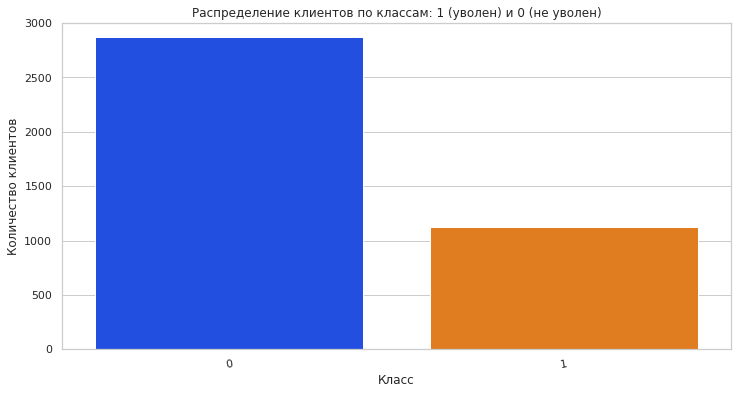

In [90]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.barplot(data = pd.DataFrame(tr_quit['quit'].value_counts()).T)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Класс',
        ylabel='Количество клиентов',
        ylim = (0,3000),
        title='Распределение клиентов по классам: 1 (уволен) и 0 (не уволен)')  
plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info">
    Налицо неравномерность распределения клиентов по целевому классу: количество увеленных клиентов (1128) 
практически в 2,5 раза меньше, чем сохранивших работу (2872).
</div>

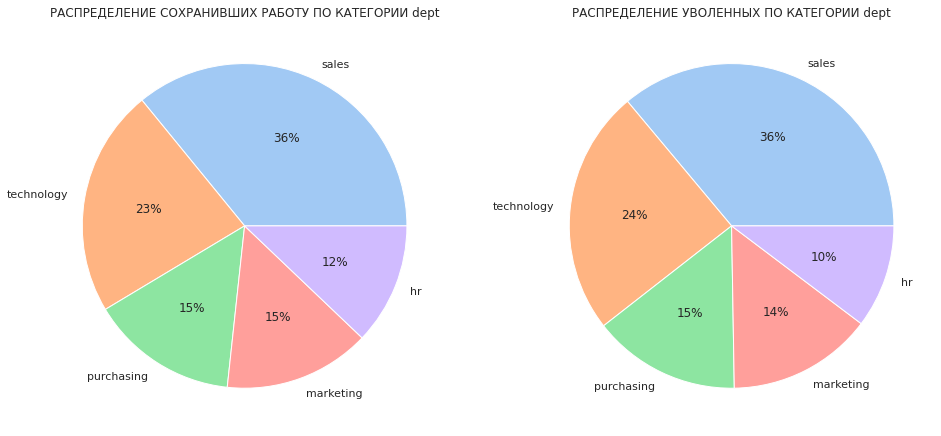

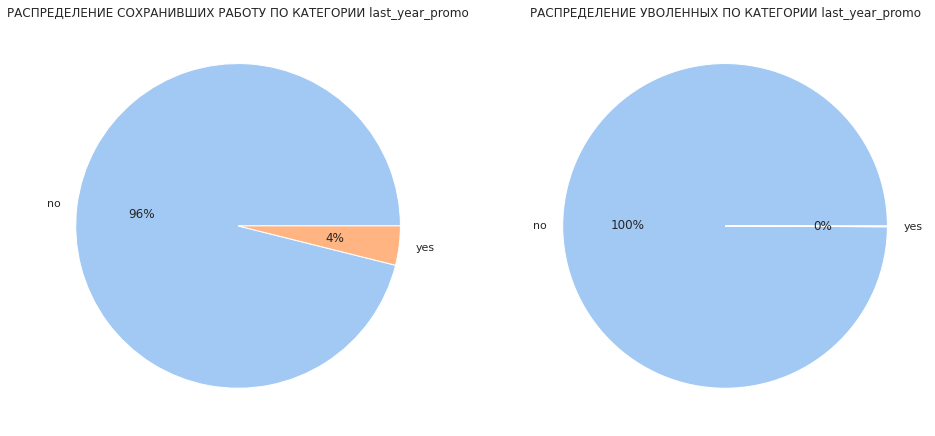

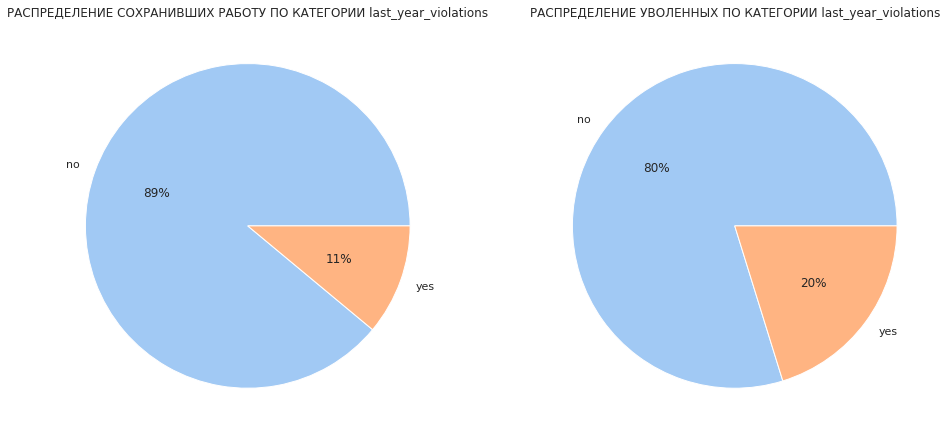

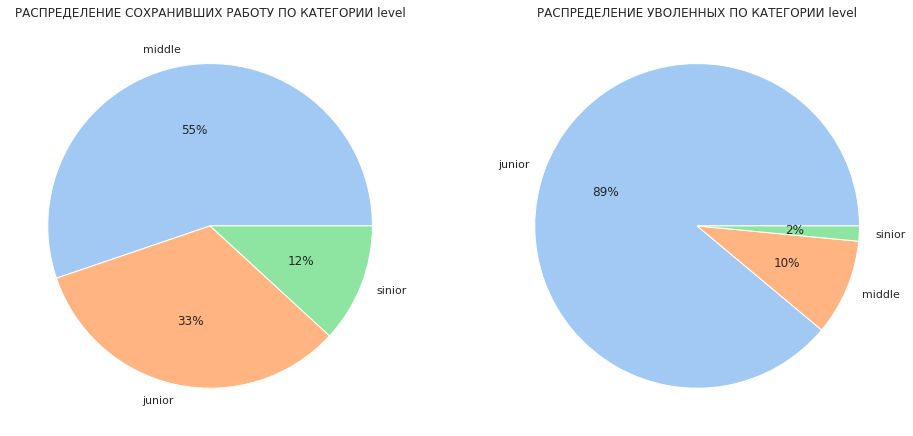

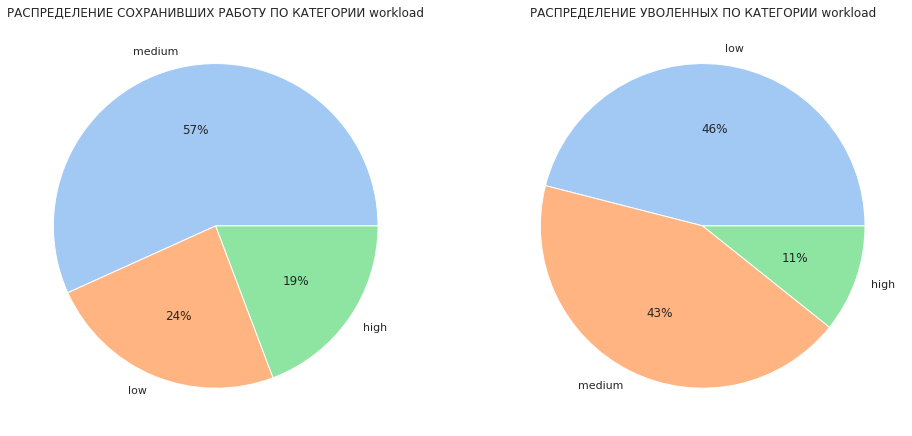

In [91]:
tr_quit_0 = tr_quit.query('quit == 0')
tr_quit_1 = tr_quit.query('quit == 1')
for i in cat_columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
    df_m = tr_quit_0.pivot_table(index = i, values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False)
    df_f = tr_quit_0.groupby(i, as_index = False)['id'].count().sort_values(by = 'id', ascending = False)
    df_mm = tr_quit_1.pivot_table(index = i, values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False)
    df_ff = tr_quit_1.groupby(i, as_index = False)['id'].count().sort_values(by = 'id', ascending = False)
    s = df_f[i].unique()
    s1 = df_ff[i].unique()
    colors = sns.color_palette('pastel')[ 0:15 ]
    labels = s
    labels1 = s1
    axes[0].pie(list(df_m['id']), labels = labels, colors = colors, autopct='%.0f%%')
    axes[0].set_title('РАСПРЕДЕЛЕНИЕ СОХРАНИВШИХ РАБОТУ ПО КАТЕГОРИИ {}'.format(i))
    axes[1].pie(list(df_mm['id']), labels = labels1, colors = colors, autopct='%.0f%%')
    axes[1].set_title('РАСПРЕДЕЛЕНИЕ УВОЛЕННЫХ ПО КАТЕГОРИИ {}'.format(i))
    plt.show()

<div class="alert alert-info">
    Относительное распределение сохранивших работу сотрудников по категориям выглядит следующим образом. 
Распределение сохранивших работу и уволенных сотрудников по отделам компании примерно одинаково. Среди сохранивших
работу 4 % получили повышение, в то время, как среди уволенных доля получивших повышение близка к 0. Среди 
оставшихся сотрудников доля не имеющих взысканий (11 %) почти в 2 раза ниже, чем среди уволенных (20 %). Среди
уволенных сотрудников доля уровня junior составляет 89 % (против 33 % у оставшихся), доля middle - 10 % 
(против 55 % у оставшихся), а доля sinior - 2 % (против 12 % у оставшихся). Среди уволившихся наибольшая доля 
сотрудников с низкой загрузкой - 46 % (у оставшихся - 24 %), а доли уволенных сотрудников со средней (43 %) и 
высокой (11 %) загруженностью ниже соответстваующих долей у сохранивших работу - 57 и 19 %, соответственно.

</div>

<div class="alert alert-info">
    Исправлено. Диаграммы распределения среднего были построены только для непрерывного признака 'salary'. Для
дискретных и категориальных признаков использованы столбчатые и круговые диаграммы распределения объектов по 
целевому признаку.   
</div>

In [92]:
df_targ = y_targ.merge(targ_quit, on = 'id', how = 'outer')

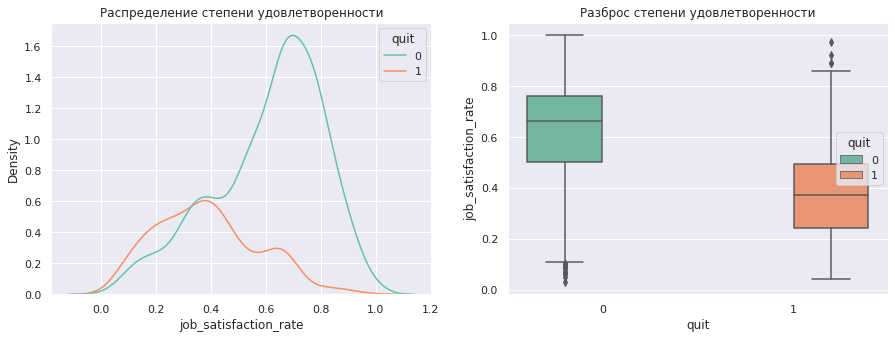

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.kdeplot(data = df_targ, x = 'job_satisfaction_rate', ax=axes[0], hue = 'quit', palette="Set2")
axes[0].set_title('Распределение степени удовлетворенности')
sns.boxplot(data = df_targ, y = 'job_satisfaction_rate', x = 'quit', ax=axes[1], hue = 'quit', palette="Set2")
axes[1].set_title('Разброс степени удовлетворенности')
plt.show()

<div class="alert alert-info">
    Наибольшее количество уволенных сотрудников имели степень удовлетворения работой в интервале 0,3 - 0,5. Максимальное же число 
не уволенных сотрудников характеризуются степенью удовлетворенности на уровне 0,7 - 0,9. Медианная удовлетворенность уволенных 
сотрудников (около 0,4) существенно ниже данного показателя для сохранивших работу сотрудников (около 0,7).
</div>

In [94]:
a = df_targ.query('quit == 0')['job_satisfaction_rate']
b = df_targ.query('quit == 1')['job_satisfaction_rate']

In [95]:
st.ttest_ind(a, b, equal_var=False, alternative='two-sided').pvalue

2.7708628031539e-101

In [96]:
st.ttest_ind(a, b, equal_var=False, alternative='greater').pvalue

1.38543140157695e-101

In [97]:
st.ttest_ind(a, b, equal_var=False, alternative='less').pvalue

1.0

<div class="alert alert-info">
   Для сравнения среднего арифметического наборов значений степени удовлетворенности сотрудников 
'job_satisfaction_rate' обоих классов был использован ttest. 
  Нулевая гипотеза H0: средние арифметические генеральных совокупностей обоих наборов удовлетворенности равны.
  Альтернативная гипотеза H1 (two-sided): средние арифметические генеральных совокупностей обоих наборов удовлетворенности НЕ равны. 
  Альтернативная гипотеза H1 (greater): среднее арифметическое генеральной совокупности класса 0 (a) больше среднего арифм ген сов 
класса 1 (b).
  Альтернативная гипотеза H1 (less): среднее арифметическое генеральной совокупности класса 0 (a) меньше среднего арифм ген сов 
класса 1 (b).
    В результате теста выяснилось, что от нулевой гипотезы (H0) необходимо откзаться в пользу гипотезы H1 'greater', 
для которой значение p-value практически близко к 0. Это означает, что среднее арифметическое генеральной совокупности
значений удовлетворенности класса 0 (не уволенные) однозначно выше, по сравнению со средним арифметическим 
совокупности значений удовлетворенности класса 1 (уволенные). 
</div>

In [98]:
st.mannwhitneyu(a, b,True,'two-sided').pvalue

5.673072286850858e-93

In [99]:
st.mannwhitneyu(a, b,True,'greater').pvalue

2.836536143425429e-93

In [100]:
st.mannwhitneyu(a, b,True,'less').pvalue

1.0

<div class="alert alert-info">   
    Использование непараметрического критерия Мана-Уитни также подтверждает, что генеральная совокупность значений 
удовлетворенности сохранивших работу сотрудников больше совокупности значений степени удовлетворенности уволившихся.
  Нулевая гипотеза H0: генеральные совокупностей обоих наборов удовлетворенности равны.
  Альтернативная гипотеза H1 (two-sided): средние арифметические генеральных совокупностей обоих наборов удовлетворенности НЕ равны. 
  Альтернативная гипотеза H1 (greater): генеральная совокупность класса 0 (a) больше ген совокупности класса 1 (b).
  Альтернативная гипотеза H1 (less): генеральная совокупность класса 0 (a) меньше ген совокупности класса 1 (b).

   Нулевая гипотеза о равенстве этих ген совокупностей отбрасывается в пользу гипотезы 'greater', для которой 
значение p-value близко к 0.
</div>

## Этап 2. Добавление нового входного признака
   <a id="start5"></a>

In [101]:
X_test_['job_satisfaction_rate'] = y_test

In [102]:
y_train_pred_ =  randomized_search.predict(X_train_)

In [103]:
X_train_['job_satisfaction_rate'] = y_train_pred_

<div class="alert alert-info">
    В таблице тестовых входных данных добавлен столбец 'job_satisfaction_rate' из таблицы входных тестовых данных, загруженных
на Этапе_1. Лучшая модель, предсказывающая степень удовлетворенности, была использована для предсказания удовлетворенности
сотрудников на новых трейновых данных, на основе которого был сформирован трейновый столбец 'job_satisfaction_rate'. 
</div>

## Этап 2. Подготовка данных
   <a id="start6"></a>

In [104]:
num_columns_d = ['salary', 'job_satisfaction_rate']

In [105]:
df_n = pd.concat([X_train_, y_train_], axis = 1)

In [106]:
phik_overview = df_n.phik_matrix(interval_cols=num_columns_d)
phik_overview.shape

(10, 10)

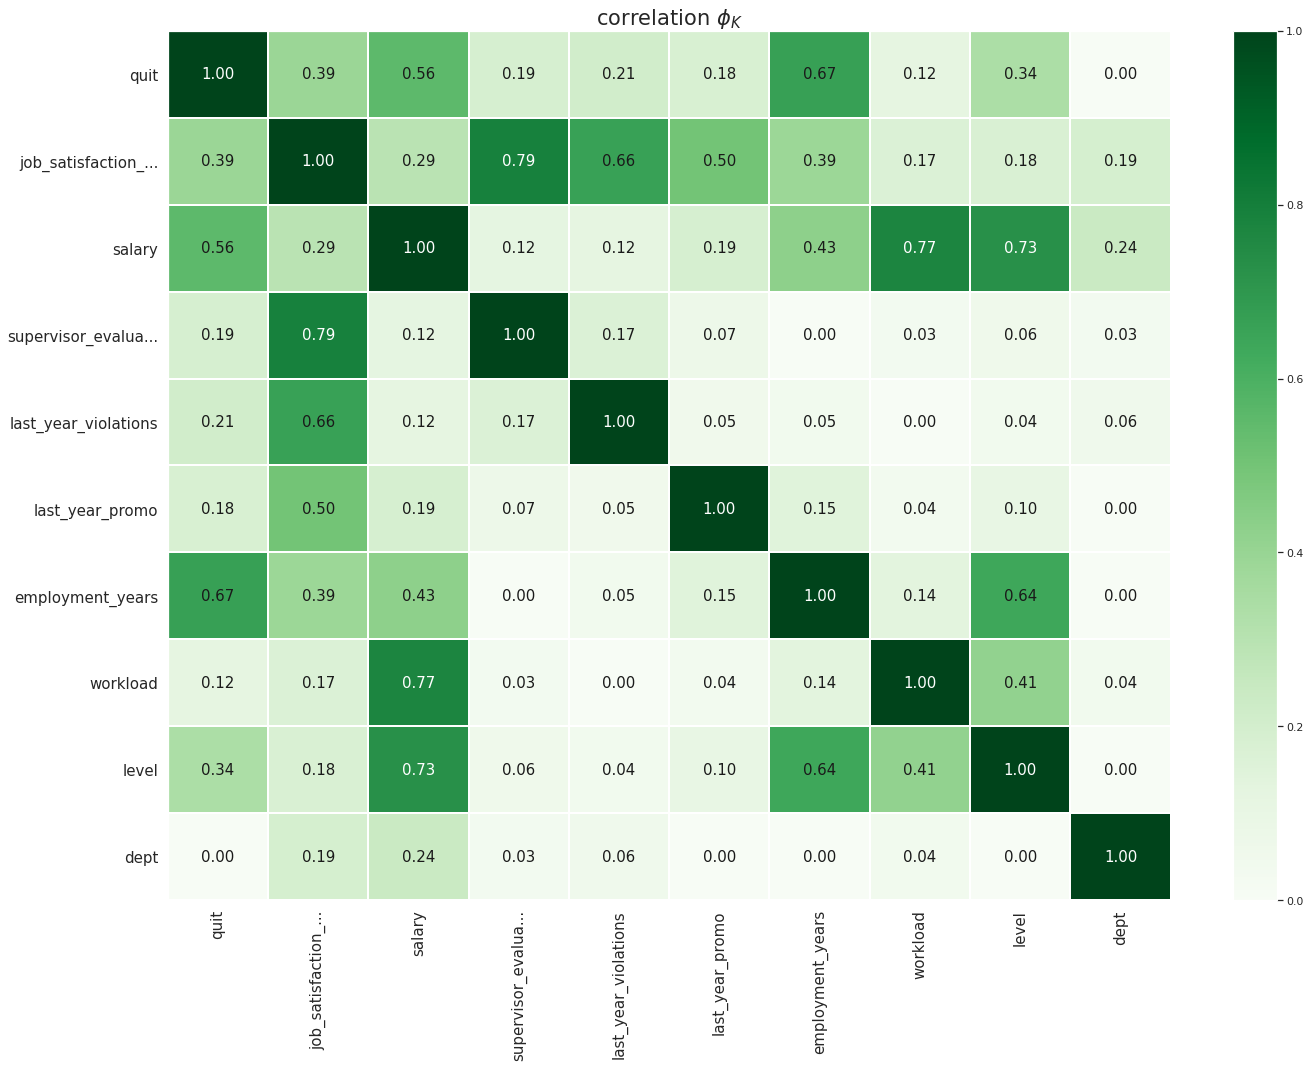

In [107]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [108]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [109]:
X_train_q = pd.DataFrame(
    data_preprocessor.fit_transform(X_train_),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_q = pd.DataFrame(
    data_preprocessor.transform(X_test_),
    columns=data_preprocessor.get_feature_names_out()    
) 

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [110]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [111]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,40),
        'models__max_features': range(2,40),
        'models__min_samples_leaf': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__kernel': ['rbf', 'sigmoid'],
        'models__C': range(1,50),
        'models__gamma': range(1,50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }   
]

<div class="alert alert-info">
    В список числовых полей внесен признак 'job_satisfaction_rate'. С откликом в наибольшей степени коррелируют 
'employment_years' (0,66), 'salary' (0,56) и 'job_satisfaction' (0,52). 
    Данные для классификации подготовлены с учетом 2 видов 
кодировки категориальных признаков (OneHotEncoder и OrdinalEncoder). Для масштабирования числовых данных используются 
кодировщики MinMaxEncoder и StandardEncoder. В качестве моделей классификации выбраны следующие: SVC, LogisticRegression,
KNeighborsClassifier и DecisionTreeClassifier. 
</div>

## Этап 2. Обучение модели классификации
   <a id="start7"></a>

In [112]:
randomized_search_ = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [113]:
randomized_search_.fit(X_train_, y_train_)

/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'models__C': range(1, 50),
                                         'models__gamma': range(1, 50),
                                         'models__kernel': ['rbf', 'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 50),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [114]:
abs(randomized_search_.best_score_)

0.9047774183324867

In [115]:
randomized_search_.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                                              ['medium',
                                                                                               'high',
                                                                                               'low']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', MinMaxScaler(),
                                                  ['employment_years', 'salary',
                                                   'supervisor_evaluation'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=5, max_features=37,
                                        min_samples_leaf=3, random_state=42))])

In [116]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search_.cv_results_)[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
    ].sort_values('rank_test_score')

rank_test_score                             param_models  mean_test_score  \
3                1  DecisionTreeClassifier(random_state=42)         0.904777   
5                2  DecisionTreeClassifier(random_state=42)         0.895550   
2                3  DecisionTreeClassifier(random_state=42)         0.894173   
6                3  DecisionTreeClassifier(random_state=42)         0.894173   
4                5  DecisionTreeClassifier(random_state=42)         0.890837   
7                6  DecisionTreeClassifier(random_state=42)         0.879319   
1                7  DecisionTreeClassifier(random_state=42)         0.876967   
8                8  DecisionTreeClassifier(random_state=42)         0.876129   
0                9  DecisionTreeClassifier(random_state=42)         0.835820   
9               10   SVC(probability=True, random_state=42)         0.640129   

                                                                                                                                                                           params  
3     {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 3, 'models__max_features': 37, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}  
5   {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 11, 'models__max_features': 26, 'models__max_depth': 29, 'models': DecisionTreeClassifier(random_state=42)}  
2   {'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 12, 'models__max_features': 16, 'models__max_depth': 36, 'models': DecisionTreeClassifier(random_state=42)}  
6    {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 12, 'models__max_features': 30, 'models__max_depth': 39, 'models': DecisionTreeClassifier(random_state=42)}  
4  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 9, 'models__max_features': 13, 'models__max_depth': 25, 'models': DecisionTreeClassifier(random_state=42)}  
7   {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 8, 'models__max_features': 3, 'models__max_depth': 12, 'models': DecisionTreeClassifier(random_state=42)}  
1      {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 7, 'models__max_features': 22, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}  
8     {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 5, 'models__max_features': 30, 'models__max_depth': 27, 'models': DecisionTreeClassifier(random_state=42)}  
0  {'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 2, 'models__max_features': 36, 'models__max_depth': 11, 'models': DecisionTreeClassifier(random_state=42)}  
9                    {'preprocessor__num': StandardScaler(), 'models__kernel': 'sigmoid', 'models__gamma': 43, 'models__C': 22, 'models': SVC(probability=True, random_state=42)}

In [117]:
y_test_pred_n =  randomized_search_.predict_proba(X_test_)[:,1]

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [118]:
roc_auc_score(y_test_, y_test_pred_n)

0.9219697643177464

<div class="alert alert-info">
   Лучшей моделью классификации является DecisionTreeClassifier со следующими гиперпараметрами: max_depth=5, max_features=37, 
min_samples_leaf=3, для масштабирования числовых данных используется MinMaxScaler(). Из 10 лучших моделей 9 - это древья 
решений. Лучшая из линейных моделей SVC на 9 месте с метрикой 0,7. Метрика на тестовой выборке вполне приемлемая - 0,92
(>0,91), и модель не переучивается. 
</div>

In [119]:
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train_q, y_train_)
dummy_model_probas = dummy_model.predict_proba(X_test_q)[:,1]

roc_auc_score(y_test_, dummy_model_probas)

0.5

<div class="alert alert-info">
   Проверка показывает неудовлетворительное качество dummy-модели, котрая присваивает объектам тестовой выборки 
классы в соответствии с долями классов в трейновой выборки. Метрика roc_auc dummy-модели минимальная - 0,5, в то 
время, как значение данной метрики лучшей модели DecisionTreeClassifier на тестовой выборке 0,92. 
</div>

In [120]:
model_ = randomized_search_.best_estimator_.named_steps['models']

In [121]:
model_.feature_importances_

array([0.        , 0.00116135, 0.00654458, 0.00604961, 0.        ,
       0.        , 0.48502458, 0.12331696, 0.08147913, 0.01101604,
       0.00219196, 0.28321579])

In [122]:
feature_importance = pd.DataFrame({'Feature': X_train_q.columns, 'Importance': np.abs(model_.feature_importances_)})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = True)

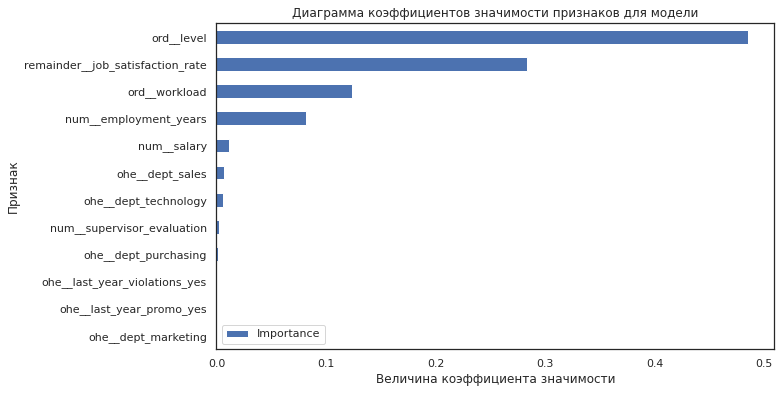

In [123]:
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Диаграмма коэффициентов значимости признаков для модели')
plt.xlabel('Величина коэффициента значимости')
plt.ylabel('Признак');

<div class="alert alert-info">
   Для модели наиболее значимы следующие признаки: 'level' (0,48), 'job_satisfaction_rate' (0,3), 'workload' (0,12), 
'employment_years' (0,1) и 'salary' (0,02). Остальные признаки не имеют значения для модели.
</div>

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without featu

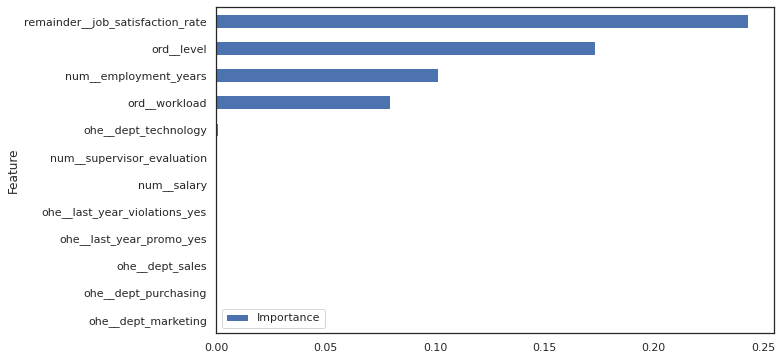

In [124]:
def score_(model_, X, y):
    y_pred = model_.predict(X)
    score = roc_auc_score(y, y_pred)
    return score

perm_list = permutation_importance(model_, X_test_q, y_test_, scoring=score_)

feature_importance = pd.DataFrame({'Feature': X_test_q.columns, 'Importance': perm_list['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)); 

<div class="alert alert-info">
   По версии метода permutation_importance() наиболее важны следующие признаки: 'job_satisfaction_rate' (0,2), 
'level' (0,17), 'employment_yeaars' (0,1), 'workload' (0,53). Все наиболее важные признаки, в целом, 
совпадают у обоих методов (feature_importances и permutation_importance), но их очередность отличается.
</div>

In [125]:
selector = SelectKBest(mutual_info_classif, k=4)
selector.fit(X_train_q, y_train_)
features_names = selector.get_feature_names_out()

In [126]:
features_names

array(['ord__level', 'num__employment_years', 'num__salary',
       'remainder__job_satisfaction_rate'], dtype=object)

In [127]:
X_train_new_ = X_train_[['level', 'employment_years', 'salary', 'job_satisfaction_rate']]
X_test_new_ = X_test_[['level', 'employment_years', 'salary', 'job_satisfaction_rate']]

In [128]:
ord_pipe_s = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [129]:
data_preprocessor_ = ColumnTransformer(
    [
        ('ord', ord_pipe_s, ['level']),
        ('num', MinMaxScaler(), ['employment_years', 'salary', 'job_satisfaction_rate'])
    ], 
    remainder='passthrough'
)

In [130]:
X_train_s = pd.DataFrame(
    data_preprocessor_.fit_transform(X_train_new_),
    columns=data_preprocessor_.get_feature_names_out()
)

X_test_s = pd.DataFrame(
    data_preprocessor_.transform(X_test_new_),
    columns=data_preprocessor_.get_feature_names_out()    
) 

In [131]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor_),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [132]:
randomized_search_s = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [133]:
randomized_search_s.fit(X_train_new_, y_train_)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ord',
                                                                                                OrdinalEncoder(categories=[['junior',
                                                                                                                            'middle',
                                                                                                                            'sinior']],
                                                                                                               handle_unknown='use_encoded_value',
                                                                                                               unknown_value=nan)),
                                                                                               ('simpleImputer_a...
                                         'models__C': range(1, 50),
                                         'models__gamma': range(1, 50),
                                         'models__kernel': ['rbf', 'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 50),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [134]:
abs(randomized_search_s.best_score_)

0.8934739166076703

<div class="alert alert-info">
    Оба метода определения степени важности признаков (feature_importances_ и permutation_importance()), связанные с моделью,
показывают, что датафрейм содержит много лишних признаков, не оказывающих на нее влияние. Методом SelectKBest() было отобрано
5 наиболее важных признаков, при этом качество модели снижается несущественно. 
</div>

In [135]:
model_s = randomized_search_s.best_estimator_.named_steps['models']

In [136]:
explainer = shap.KernelExplainer(model_s.predict_proba, X_train_s)
shap_values = explainer(X_test_s)

Using 2587 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/2000 [00:00<?, ?it/s]

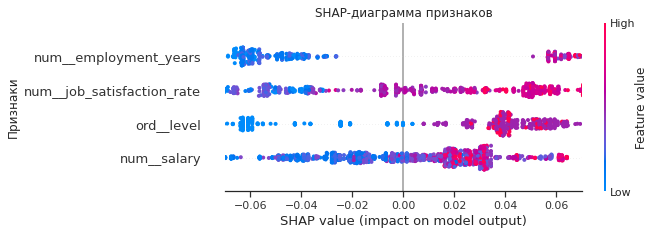

In [137]:
shap.plots.beeswarm(shap_values[..., 0], max_display=9, show = False);

fig, ax = plt.gcf(), plt.gca()


xlim = 0.07
ax.set_xlim(-xlim, xlim)
#ax.set_title('SHAP-диаграмма признаков')
ax.set (ylabel='Признаки',
        title='SHAP-диаграмма признаков');  

<div class="alert alert-info">
    Для ускорения работы модуля shap скоратили количество значимых признаков до 3. Диаграмма Шепли показывает, что повышение
признаков 'employment_years', 'job_satisfaction_rate', 'salary' и 'level' вполне предсказуемо увеличивает вероятность
принаждежности к классу сотрудников, сохранивших работу. 
</div>

## Выводы
   <a id="start8"></a>

<div class="alert alert-info"> 
 
<b>Загрузка и предобработка данных</b>

    В таблицах с входными тестовыми данными df_test и тестовым откликом y_test содержится по 2000 строк, все типы данных 
определены верно, пропусков нет. 
    В таблице с трейновой выборкой df_tr содержится 4000 строк, все типы данных определены верно, есть пропуски в поле 'dept' 
(6) и в поле 'level' (4). В таблице с тестовой выборкой X_test содержится 2000 строк, все типы данных определены верно, есть
пропуски в поле 'dept' (2) и в поле 'level' (1). Спомощью pipeline столбцы были масштабированы следующим образом.
Столбцы категориальных признаков 'dept', 'last_year_promo', 'last_year_violations' были обработаны OneHotEncoder() с 
игнорироваанием пропусков в тестовой выборке. Стобцы с порядковыми категориальными признакамми 'level', 'level' были обработаны
OrdinalEncoder() с заменой неизвестных данных на NaN. Пропуски в полях с категориальными признакмми были заполнены с 
применением метода SimpleInputer() с заменой пропусков на моды. В обработанных трейновой и тестовой выборках пропусков нет. 

<b> Исследовательский анализ данных </b>

    Распределение непрерывных признаков показывает, что для сотрудников среднее количество лет, проведенных в компании, 
составляет 3,7 года, медианное количество лет немного меньше - 3 года, а стандартное отклонение достаточно велико - 2,5 года, 
что говорит о наличии выбросов или отклонении от нормального распределения. Средняя оценка руководителя составляет 3,47 при 
медианной оценке 4. Стандартное отклонение оценки (1) невелико и составляет примерно 25 % от среднего. Средняя и медианная 
зарплаты близки и раны, соответственно, 33927 и 30000, а стандартное отклонение довольно значительно (14900) и составляет 
почти 50 % от средней зарплаты. Средний уровень удовлетворенности сотрудника (0,53) практически совпадает с медианным (0,56),
но стандартное отклонение (0,23) почти 50 % от среднего, так что в выборе вероятны выбросы. 
     Гистограмма распределения количества лет, проведенных работниками на предприятии, показывает, что во всем диапазоне, кроме 
самого начального (до 2 лет) преобладают сотрудники с уровнем удовлетворения выше 0,5, и только в ниже с выслугой менее 
2 лет преобладают недовольные сотрудники. Медианный уровень выслуги лет у довольных сотрудников немного выше, по сравнению 
с недовольными, выбросы отсутствуют. Распределение оценки руководителя нарушает непрерывность признака, но близко к нормальному,
большинство сотрудников имеют оценку 4. Здесь прослеживается четкая дифференциация сотрудников по уровню их удовлетворения:
недовольные сотрудники преобладают на уровнях оценки ниже 3,5, а довальные составляют более 90 % сотрудников, имеющих оценку 
4 и выше. Медианная оценка довольных сотрудников (4) также намного выше медианной оценки недовольных (2,5). Во всем диапазоне
зарплат довольные сотрудники составляют большинство, однако, медианные уровни зарплат довольных и недовольных работников близки - около 30000.
      Точечные диаграммы зависимости удовлетворенности от числовых признаков с разбивкой по категориям показывает, что зарплата и 
выслуга лет мало влияют на степнь удовлетворенности сотрудника во всех отделах компании, которая заметно повышается только при 
увеличении оценки руководителя выше 3,5. Во всех группах по выслуге лет и оценке руководства сотрудники, получившие продвижение
за последний год, имеют наибольшую степень удовлетворения. Также степень удовлетворенности сотрудников заметно выше при условии
повышения и зарплаты выше среднего уровня (40000). Во всем диапазоне зарплат, выслуге лет и оценок руководства сотрудники,
имевшие нарушения, имеют наименьший уровень удовлетворения. Уровень позиции сотрудника практически не влияет на степень его 
удовлетворения. В некоторых категориях, например, при оценке супервайзера 3, более довольны сотрудники уровня middle. Также в 
интервале зарплат 40000 - 60000 довольство работников уровня sinior заметно ниже, по сравнению с другими зарплатными интервалами.
Степень загруженности сотрудников также не оказывает заметного воздействия на уровень их удовлетворенности. Видимо, это связано
с тем, что наиболее загруженные сотрудники имеют более высокую зарплату, которая уравновешивает степень их удовлетворенности.
    Излишне высокой взаимной корреляции признаков (выше 0,9) не обнаружено. Наибольшая корреляция наблюдается между признаками
'salary' и 'workload' (0.79), а также между 'salary' и 'level' (0,72). На цель в наибольшей степени влияет 'supervizor_evaluation'
(0.73). Бесполезных для цели признаков тоже нет, так как самая низкий коэф корреляции между целью и 'workload' выше 10 % (12 %).
     Коэффициенты корреляции отклика с признаками, а также коэффициенты взаимной корреляции признаков в тестовой выборке 
аналогичны трейновой.
      Степень взаимной корреляции количественных признаков проверена с помощью оценки для каждого признака коэффициента инфляции
дисперсии (VIF), который характеризует степень корреляции между данным признаком и другими признаками модели. Проверка 
показала, что коэффициенты VIF для всех факторов существенно меньше 5 (лежат в пределах 1 - 1,5), что означает умеренную
взаимнную корреляцию, которая недостаточно велика, чтобы повлиять на надежность модели.
  
<b> Обучение моделей </b>
     
     Для сравнения в пайплане выбраны модели линейной регрессии linear_Regression, Lasso, Ridge, SVR. Также сравниваются модель 
KNeighborsRegressor и дерево решений DecisionTreeRegressor. Лучшую метрику имеет модель DecisionTreeRegressor со следующими
гиперпараметрами: 'models__min_samples_leaf' = 5, 'models__max_features' = 19, 'models__max_depth' = 14. Для масштабирования
числовых данных используется StandardScaler(). Среднее значение метрики SMAPE при кросс-валидации с применением метода 
RandomizedSearchCV() для данной модели равно 14,93. В 10 лучших моделей входит модель SVR (10 место) со средней величиной
метрики 26,44. 
    Модель практически не переучивается (ошибка разброса нет) - значение метрики SMAPE на тестовой выборке составляет 13,71.
    Изучение значимости признаков для лучшей модели показывает, что наибольший вклад в регрессию с большим отрывом вносит 
признак 'supervisor_evaluation' (около 0,7), затем идут признаки 'salary' (0,1), 'employment_years' (0,09), 
'last_year_violations_yes' (0,05) и 'level' (0,05). Вклад остальных признаков несущественен. 
     Из всех рассмотренных моделей в рамках указанных для варьирования диапазонов гиперпараметров наилучшей оказалась модель
дерево решений, так как данная модель основана на применении условных операторов и, в целом, более эффективна, по сравнению с 
моделями линейной регрессии. 
    Модели линейной регрессии (Linear_Regression, Lasso и Ridge), а также модель KNeighborsRegressor не дают приемлемых решений.
    При дальнейшем усложнении моделей DecisionTreeRegressor и SVR (расширении диапазона варьирования значений гиперпараметров)
при кросс-валидации обе модели показывает среднюю метрику SMAPE ниже 15, но при этом растет степень переучивания модели. 
     Упрощение моделей при снижении диапазонов варьирования гиперпараметров приводит к увеличению средней метрики при 
кросс-валидации выше 15 (ошибка смещения).  

<b> Этап-2. Загрузка и обработка данных </b>

    В таблице трейновых данных все типы полей определены верно, пропусков нет.
    В таблице целевого признака типы данных верные, пропусков нет.
    Произведено масштабирование трейновых и тестовых данных с использованием OneHotEncoder() и OrdinalEncoder() для 
категориальных данных и MinMaxEncoder() для численных данных. Целевой признак закодирован с помолщью LabelEncoder().

<b> Этап-2. Исследовательский анализ данных </b>

    Распределение непрерывных признаков показывает, что для сотрудников среднее количество лет, проведенных в компании, 
составляет 3,7 года, медианное количество лет немного меньше - 3 года, а стандартное отклонение достаточно велико - 2,54 года, 
что говорит о наличии выбросов или отклонении от нормального распределения. Средняя оценка руководителя составляет 3,47 при 
медианной оценке 4. Стандартное отклонение оценки (1) невелико и составляет примерно 25 % от среднего. Средняя и медианная 
зарплаты близки и раны, соответственно, 33805 и 30000, а стандартное отклонение довольно значительно (15152,4) и составляет 
почти 50 % от средней зарплаты. 
    Наибольший риск быть увеленными у сотрудников с относительно коротким сроком работы в компании - до 3 лет. После 4 лет 
работы сотрудников практически не увольняют. Медианный срок работы уволенных сотрудников менее 1 года, а не увелинных - 4 года.
Среди уволенных сотрудников есть много выбросов со стажем работы до 10 лет. Более 80 % сотрудников, имеющих оценку руководителя
3 и ниже, увольняют. При оценках 4 и 5 увольняют менее 20 % сотрудников. Медианная оценка уволенных сотрудников составляет 3 
балла, а не уволенных - 4 балла. Более 90 % уволенных сотрудников имели относительно низкую зарплату - менее 40000. Среди 
сотрудников с зарплатами 40000 - 50000 количество не уволенных более 80 %, а в интервале зарплат более 50000 уволенных 
практически нет. Медианная зарплата уволенных составляет около 25000, а не уволенных - порядка 35000. Среди обоих категорий
есть много выбросов с аномально высокими зарплатами - 80000 - 100000 для не уволенных и 45000 - 80000 для уволенных. 
    Средние значения признака 'employment_years' более, чем в 2 раза ниже у уволенных сотрудников, по сравнению с не уволенными 
во всех категориях признака 'debt'. Кроме того, средняя оценка не уволенных на 15 - 20 % по сравнению с уволенными, а зарплата
не уволенных выше на 30 - 50 % во всех подразделениях компании 'debt'. Уволенные сотрудники, у которых не было повышения в 
прошлом году, работали в компании в среднем уколо 2 лет, а не уволенные - около 4,5 лет. И, наоборот, уволенные сотрудники с 
недавним повышением работали в компании около 6 лет, а не уволенные - около 4,5 лет. То есть, повышенные сотрудники с высоким 
стажем работы в компании склонны к увольнению, например, в связи с переходом в другие компании на более высокие должности или 
оклад. Имеющие и не имеющие повышение уволенные сотрудники имеют среднюю оценку руководителя на 10-15 % ниже, чем не уволенные, 
а средняя зарплата не уволенных на 30 и 50 % выше, по сравнению с уволенными, соответственно, в категориях не имеющих и имеющих
повышение. Не уволенные сотрудники не имеющие нарушения работают в компании, в среднем, около 4 лет, а уволенные без замечаний -
около 2 лет. Аналогичная ситуация с сотрудниками, имеющими нарушения, - средняя выслуга не уволенных более 5 лет, а уволенных - 
также около 2 лет. То есть, компания более толеранта к сотрудникам, имеющим более долгий стаж. Средняя оценка не уволенных без
нарушений на 10-15 % выше, чем уволенных, а средняя оценка не уволенных с нарушениями всего на 3 - 5 % выше, по сравнению с 
уволенными. Уволенные сотрудники имеют среднюю зарплату на 40-45 % ниже, по сравнению с не уволенными не зависимо от наличия 
нарушений. Во всех категориях уровня позиции сотрудника выслуга лет выше у не уволенных, по сраванению с уволенными - на 15 %
(junior), 40 % (middle) и 30 % (sinior). Также средняя оценка и средняя зарплата не уволенных всех уровней на 10-15 % выше, чем 
уволенных. Выслуга лет не уволенных сотрудников в 2 - 2,5 разы выше, чем уволенных при любом уровне загруженности. Оценка и 
зарплата не уволенных сотрудников на 15-20 % выше, по сравнению с уволенными, во всех категориях занятости. 
     На основании анализа можно сформулировать основные черты уволенного сотрудника: уволенный сотрудник мог работать в любом
отделе компании и мог иметь, как низкий и средний, так и высокий уровень загруженности. Средний срок его службы составлял 2 года,
средняя оценка руководителя такого сотрудника составляла 3, а зарплата в составляла менее 30000. Маловероятно, что уволенный 
сотрудник был повышен в прошлом году, а если он все-таки получил повышение, то его выслуга лет в компании составляла в среднем 
6 лет. 
     Наибольшее количество уволенных сотрудников имели степень удовлетворения работой в интервале 0,3 - 0,5. Максимальное же число 
не уволенных сотрудников характеризуются степенью удовлетворенности на уровне 0,7 - 0,9. Медианная удовлетворенность уволенных 
сотрудников (около 0,4) существенно ниже данного показателя для сохранивших работу сотрудников (около 0,7).

<b> Этап-2. Добавление нового входного признака </b>

    В таблице тестовых входных данных добавлен столбец 'job_satisfaction_rate' из таблицы входных тестовых данных, загруженных
на Этапе_1. Лучшая модель, предсказывающая степень удовлетворенности, была использована для предсказания удовлетворенности
сотрудников на новых трейновых данных, на основе которого был сформирован трейновый столбец 'job_satisfaction_rate'. 

<b> Этап-2. Подготовка данных </b>

    В список числовых полей внесен признак 'job_satisfaction_rate'. С откликом в наибольшей степени коррелируют 
'employment_years' (0,66), 'salary' (0,56) и 'job_satisfaction' (0,52). 
    Данные для классификации подготовлены с учетом 2 видов 
кодировки категориальных признаков (OneHotEncoder и OrdinalEncoder). Для масштабирования числовых данных используются 
кодировщики MinMaxEncoder и StandardEncoder. В качестве моделей классификации выбраны следующие: SVC, LogisticRegression,
KNeighborsClassifier и DecisionTreeClassifier. 

<b> Этап-2. Обучение модели классификации </b>

    Лучшей моделью классификации является DecisionTreeClassifier со следующими гиперпараметрами: max_depth=5, max_features=8, 
min_samples_leaf=2, для масштабирования числовых данных используется StandardScaler(). Из 10 лучших моделей 9 - это древья 
решений. Лучшая из линейных моделей SVC на 9 месте с метрикой 0,84. Метрика на тестовой выборке вполне приемлемая - 0,93
(>0,91), и модель не переучивается. 
    Для модели наиболее значимы следующие признаки: 'job_satisfaction_rate' (0,4), 'employment_years' (0,35), 'level' (0,25),
'salary' (0,07) и 'workload' (0,05). Остальные признаки не имеют значения для модели.
    По версии метода permutation_importance() наиболее важны следующие признаки: 'job_satisfaction_rate' (0,125), 
'level' (0,075), 'workload' (0,075) и 'salary' (0,025). Причем признак 'job_satisfaction_rate' наиболее важен с точки зрения
обоих методов (feature_importance и permutation_importance). Остальные выбранные признаки тоже, в целом совпадают, у обоих 
методов.
     Оба метода определения степени важности признаков (feature_importances_ и permutation_importance()), связанные с моделью,
показывают, что датафрейм содержит много лишних признаков, не оказывающих на нее влияние. Методом SelectKBest() было отобрано
6 наиболее важных признаков. Это позволило немного повысить качество модели, увеличив метрику roc_auc до 0,93. 
      Для ускорения работы модуля shap скоратили количество значимых признаков до 3. Диаграмма Шепли показывает, что повышение
признаков 'employment_years', 'job_satisfaction_rate' и 'salary' вполне предсказуемо увеличивает вероятность принаждежности к 
классу сотрудников, сохранивших работу.

## Рекомендации
   <a id="start9"></a>

<div class="alert alert-info">
    В зоне риска увольнения находятся, в основном, сотрудники уровня junior, которые не получают достаточной 
рабочей нагрузки, имеют относительно низкие зарплаты и, соответственно, низкую степень удовлетворенности от работы.
Для снижения вероятности увольнения такого сотрудника необходимо применять к выявленным объектам мотивирующие 
планы, позволяющие открыть перед сотрудником карьерные перспективы, увеличить его полезную загруженность и повысить
заинтересованность, используя премиальные бонусы. Задачей является сохранение сотрудника и скорейший перевод его
на уровень middle, где вероятность увольнения кратно ниже. Однако, играет роль и собственная позиция сотрудника: 
если сотрудник имеет низкую оценку руководителя, а также нарушения рабочего распорядка, то вероятность его увольнения
существенно растет, и от такого сотрудника лучше избавиться, не растрачивая ресурсы на его дополнительную мотивацию.
С другой стороны, для сотрудников с большим стажем работы в компании дальнейшее повышение в должности может привести
к риску увольнения, так как такие сотрудники весьма востребованы на рынке и достаточно легко могут найти новую 
компанию с лучшими условиями. Таких опытных сотрудников можно удержать, повысив их уровень удовлетворенности, 
например, за счет реализации зарплатных и карьерных амбиций. 
</div>